# Plotting codon coverage distribution for each individual sample - PfDHFR (Haiti)

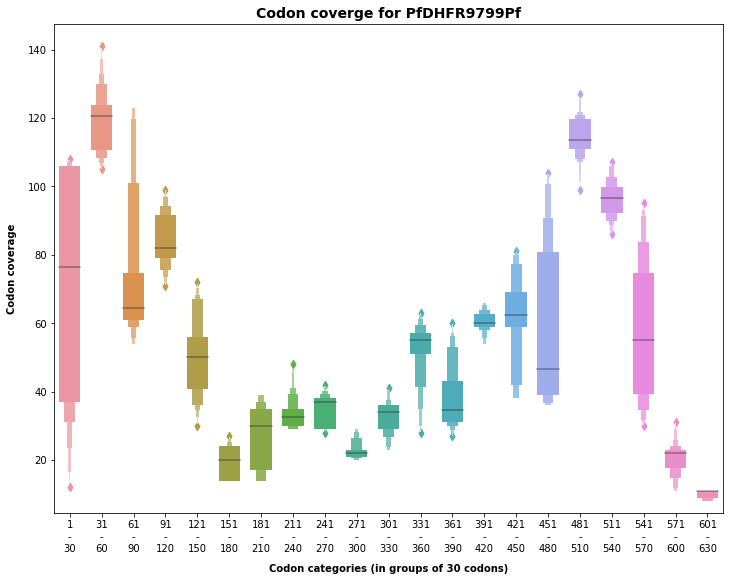

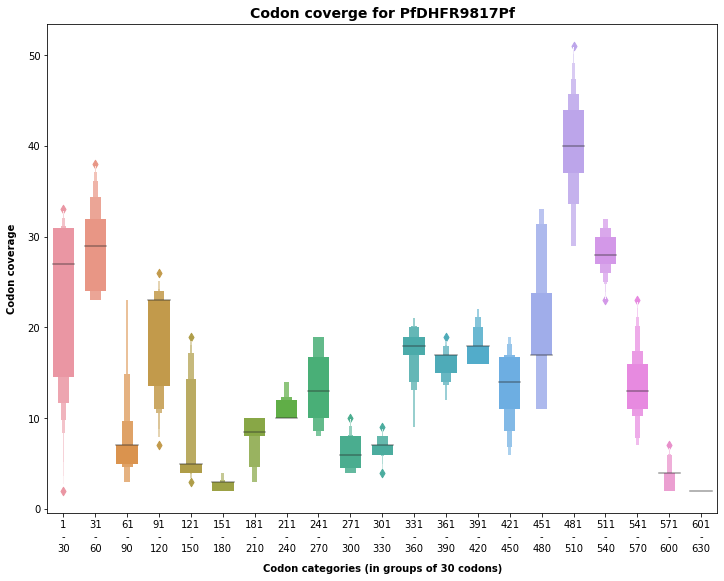

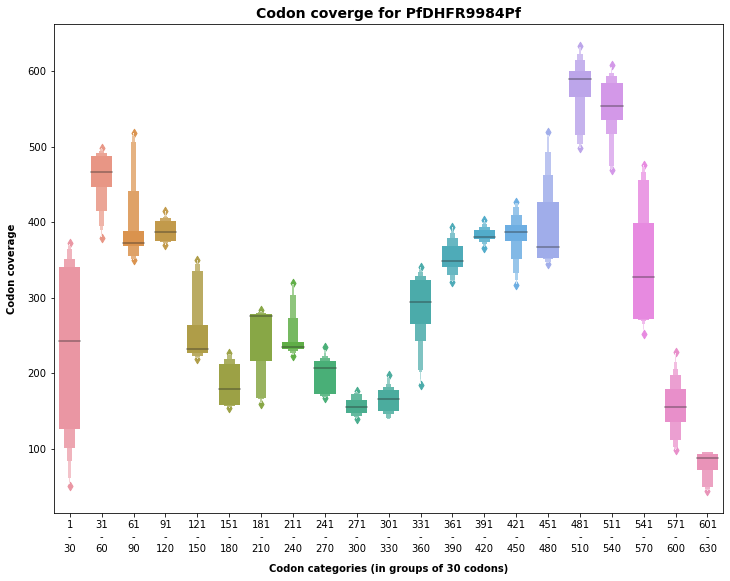

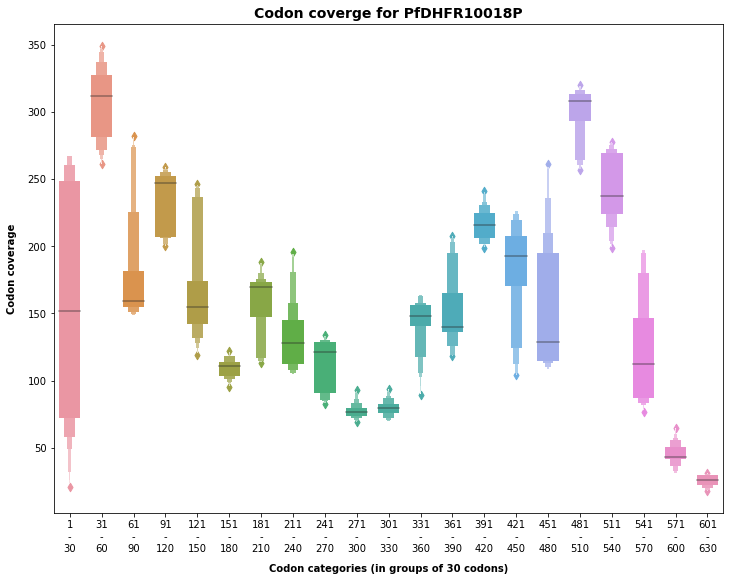

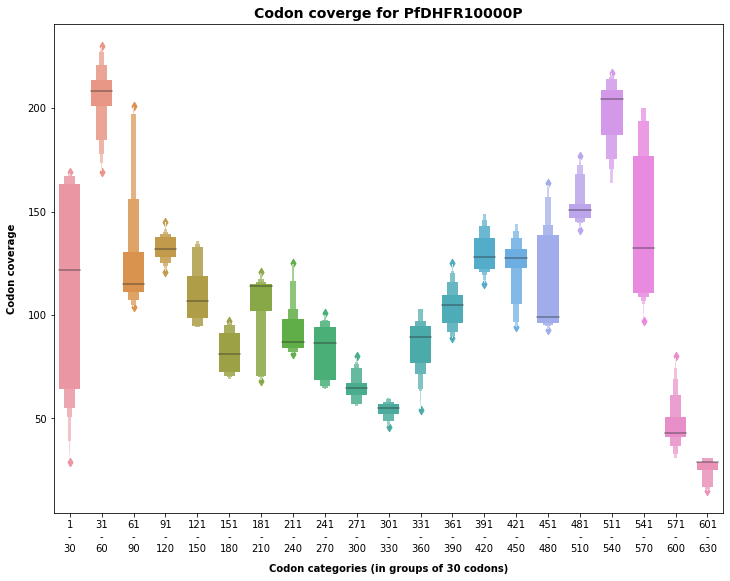

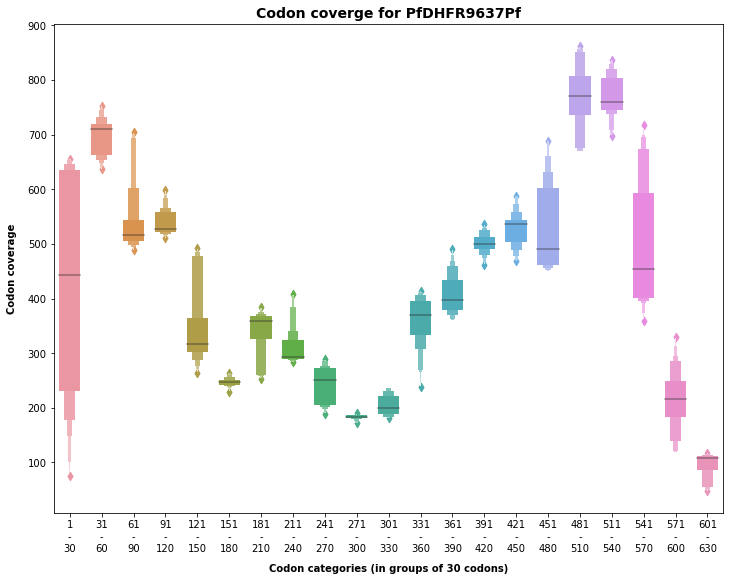

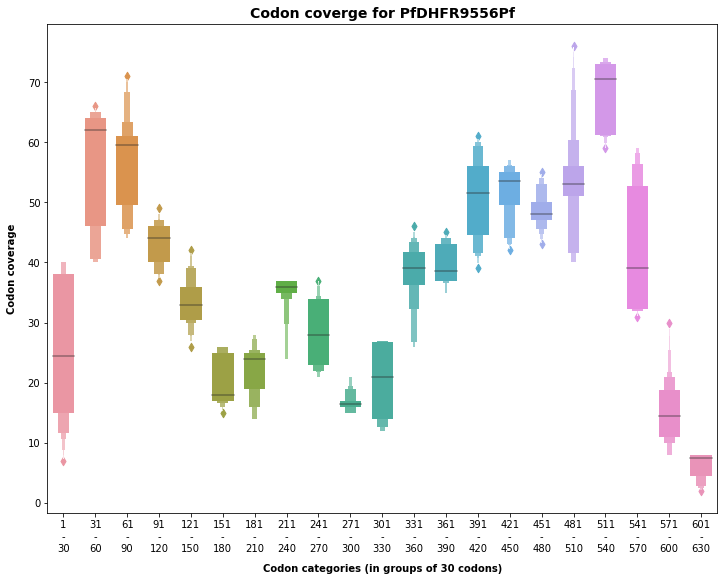

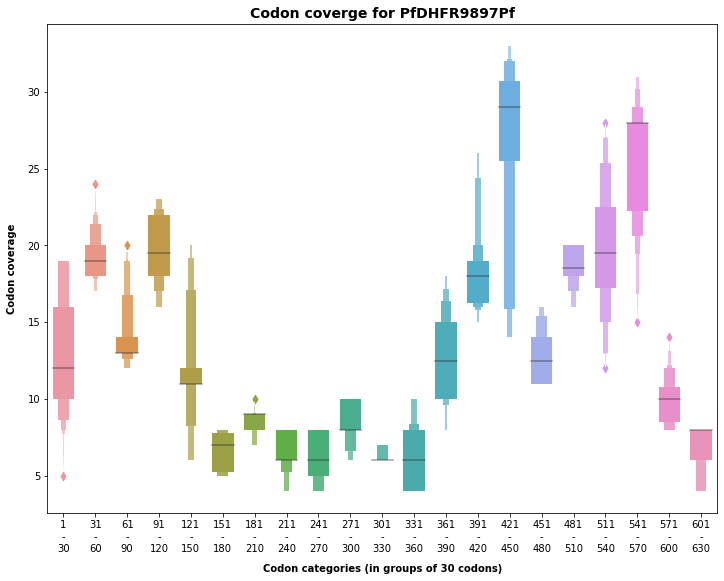

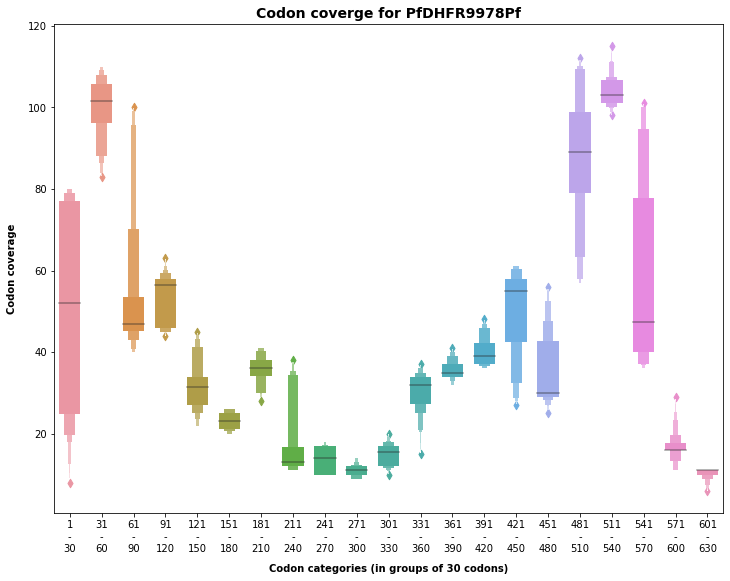

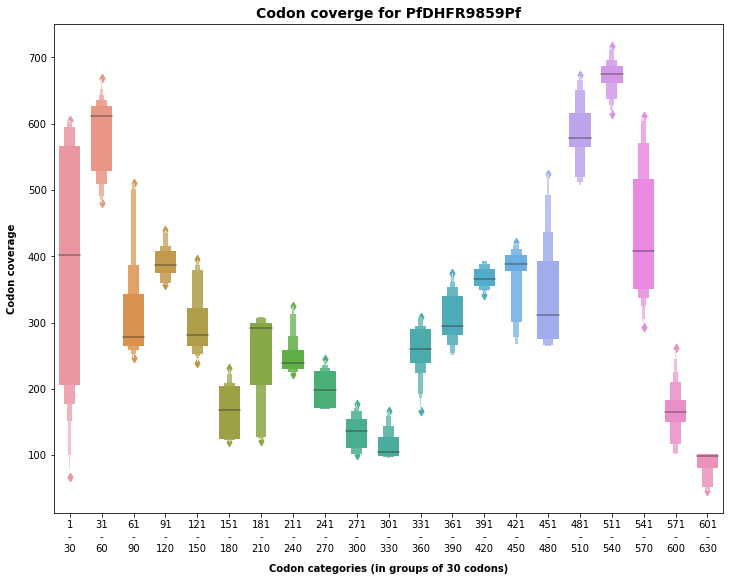

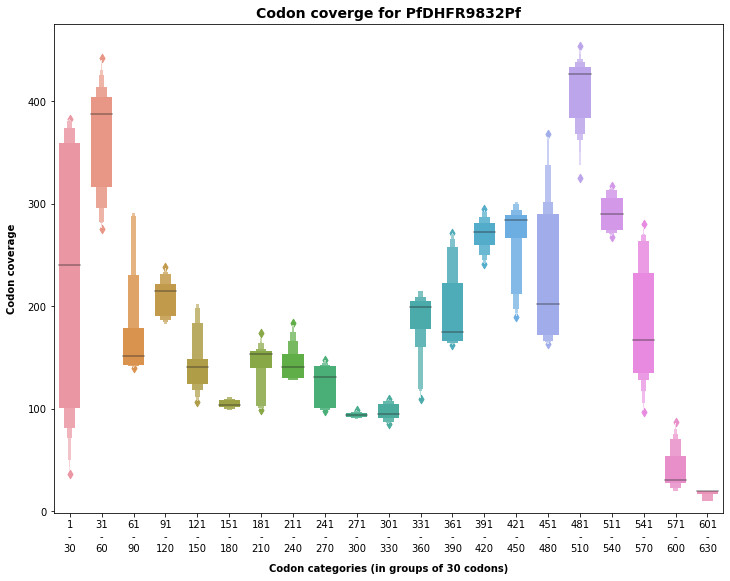

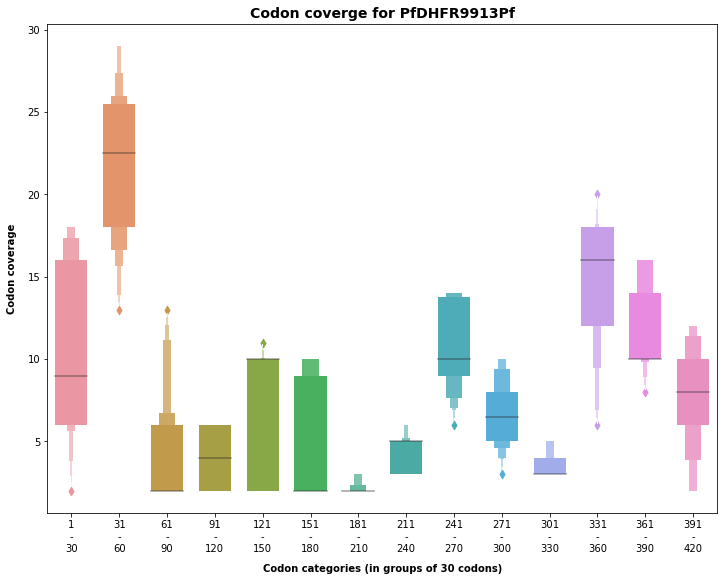

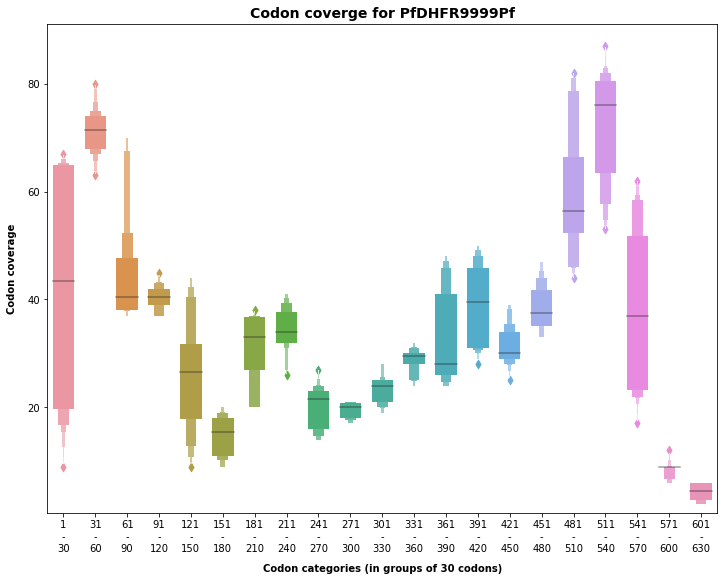

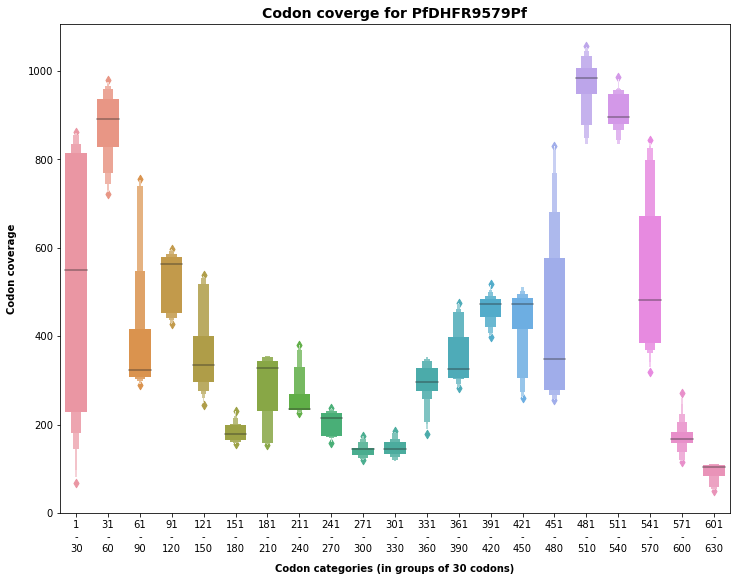

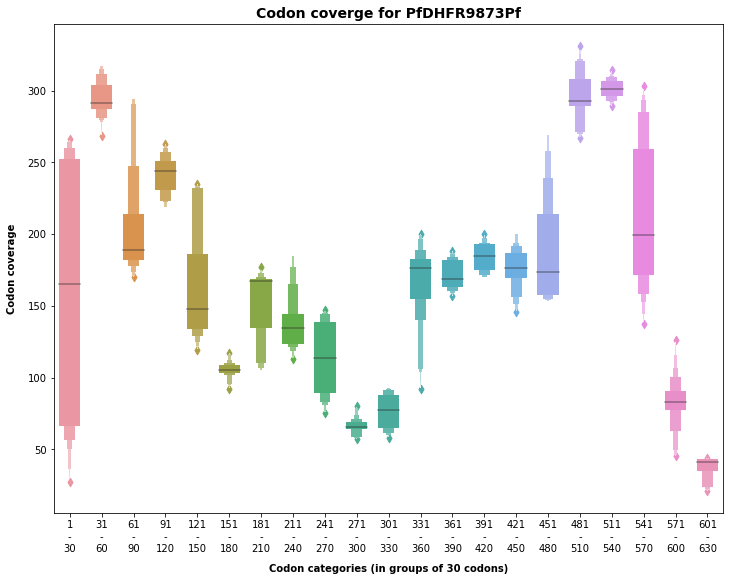

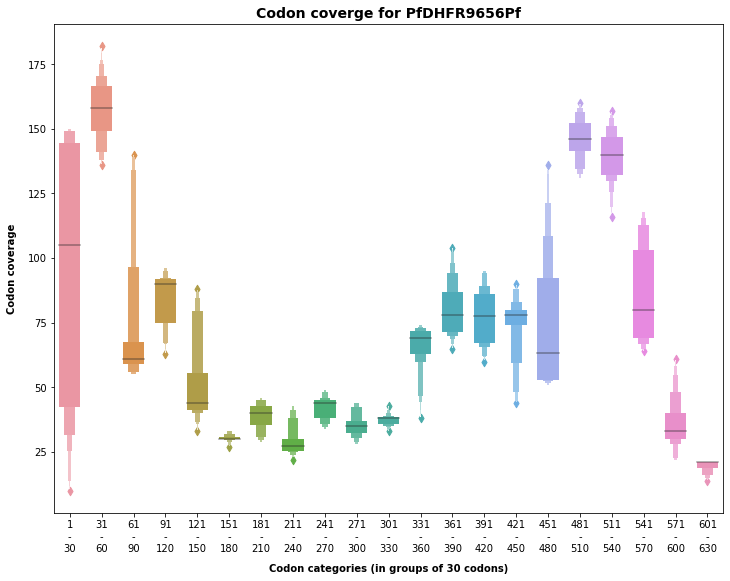

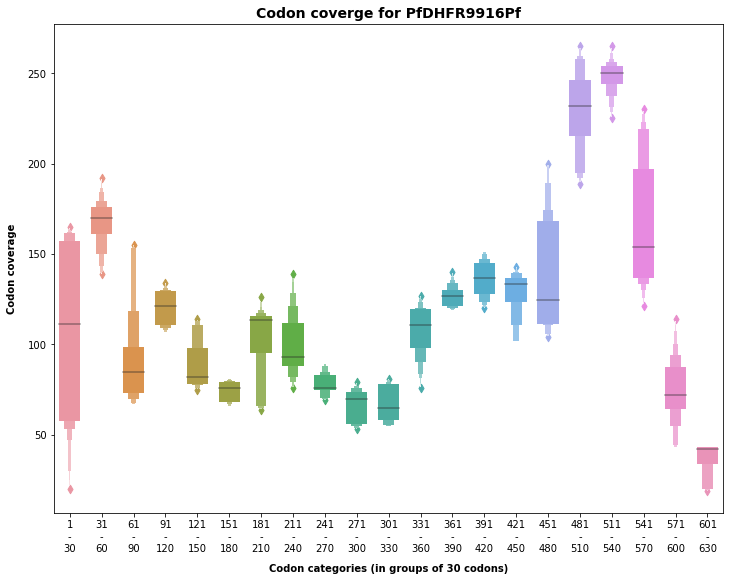

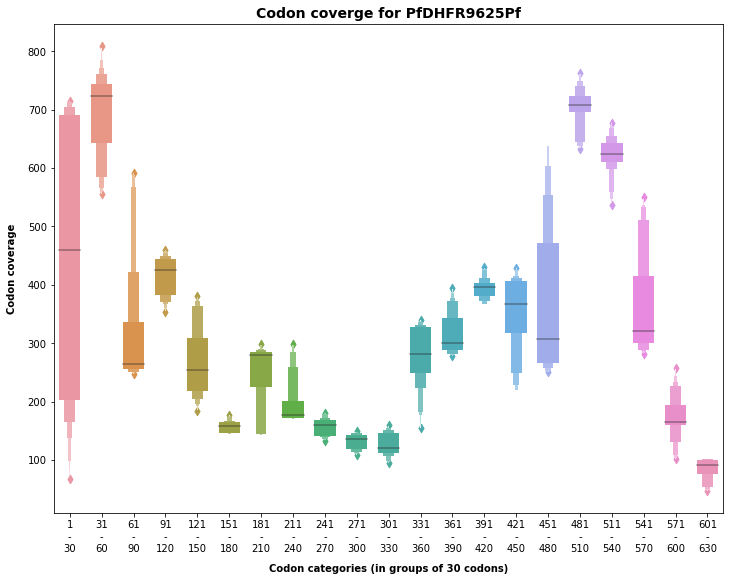

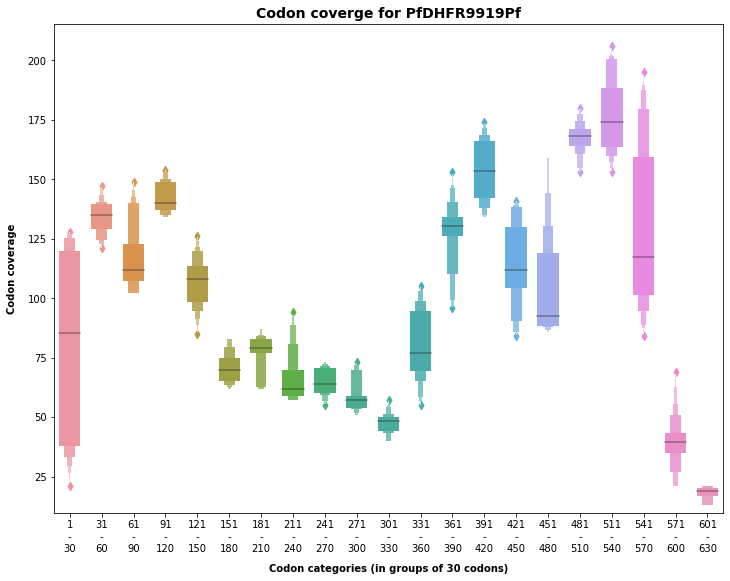

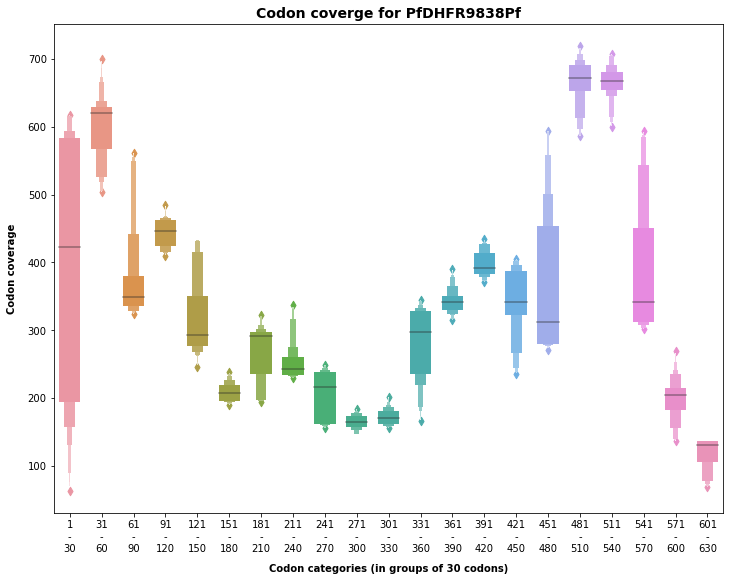

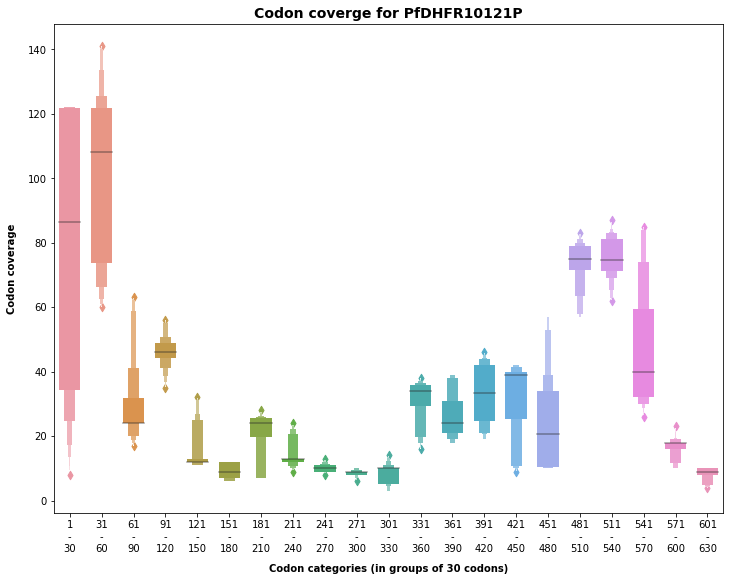

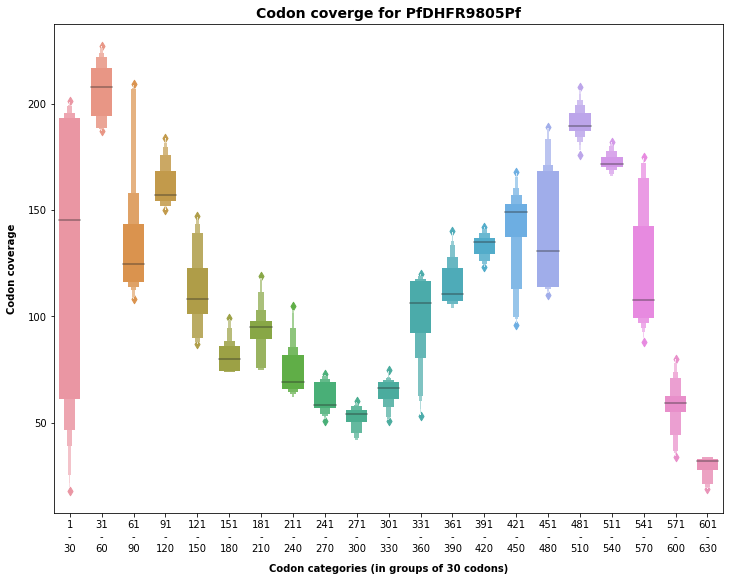

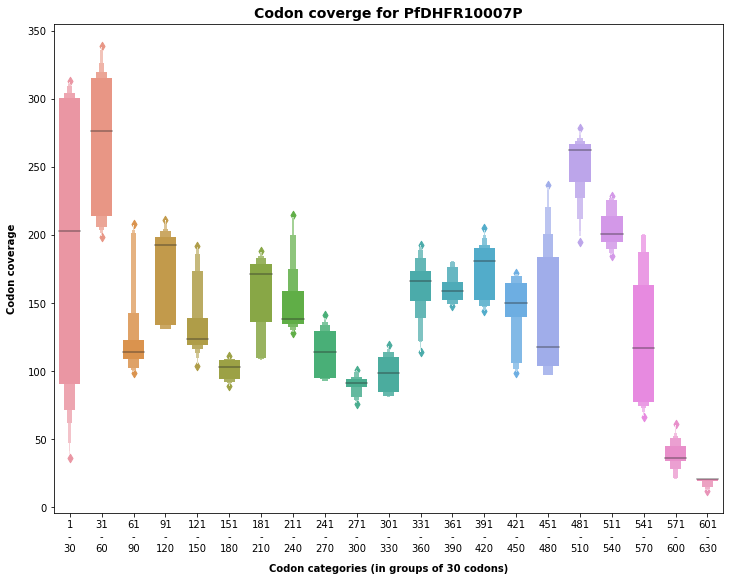

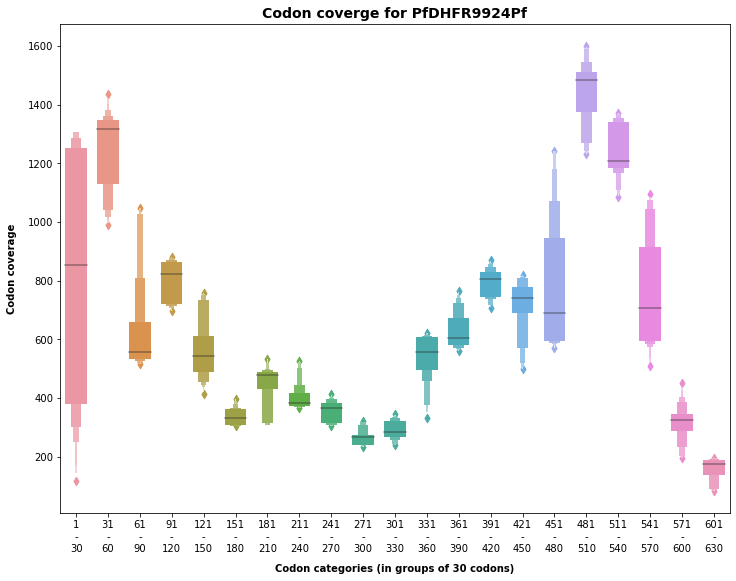

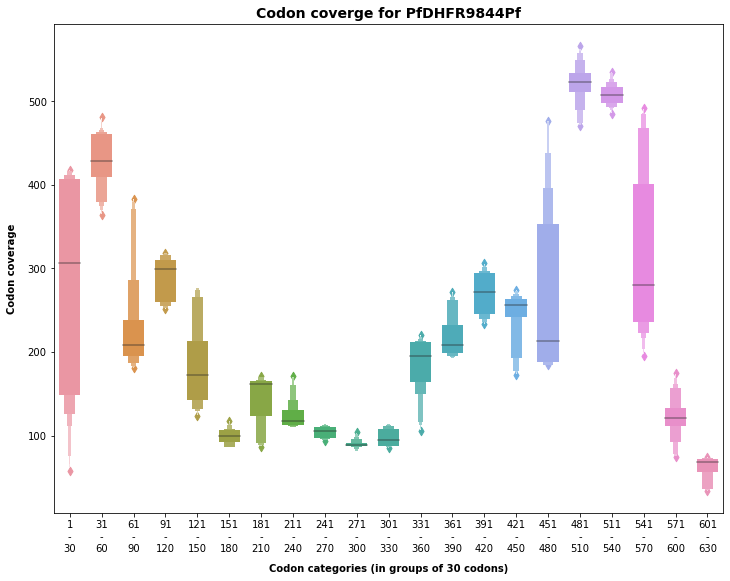

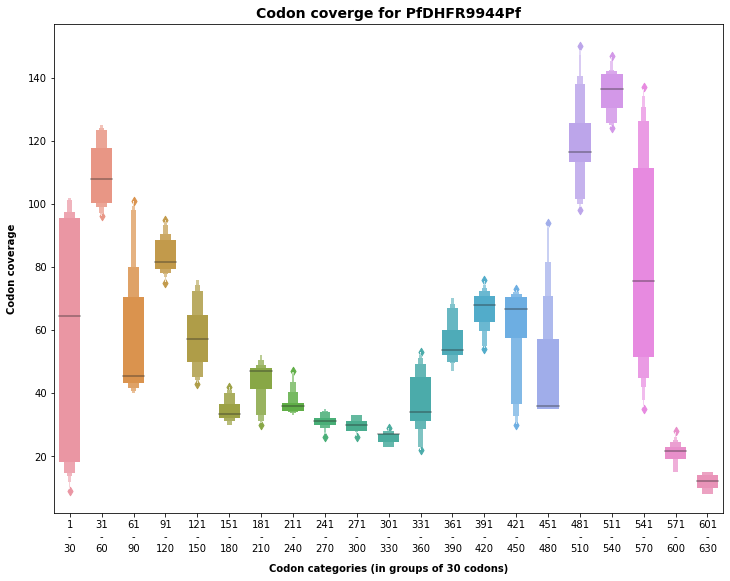

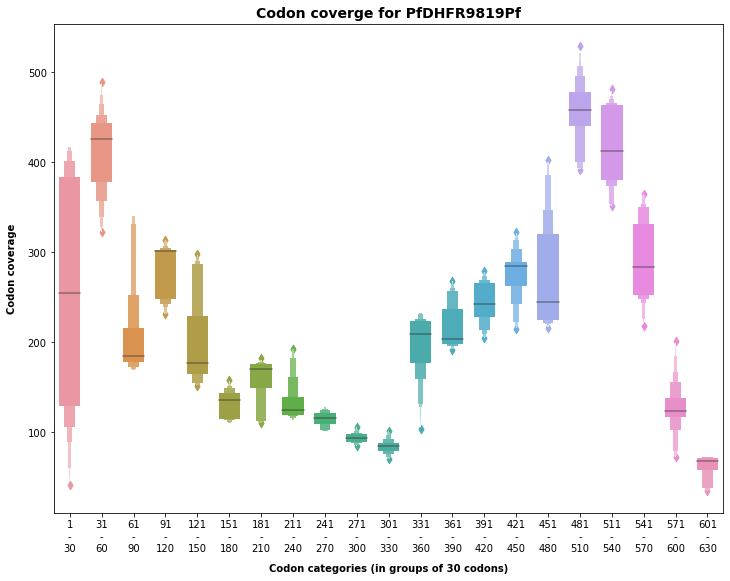

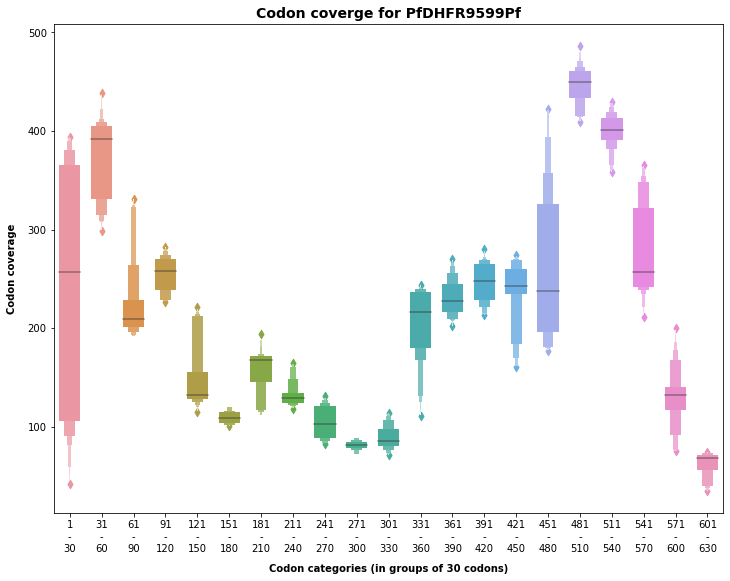

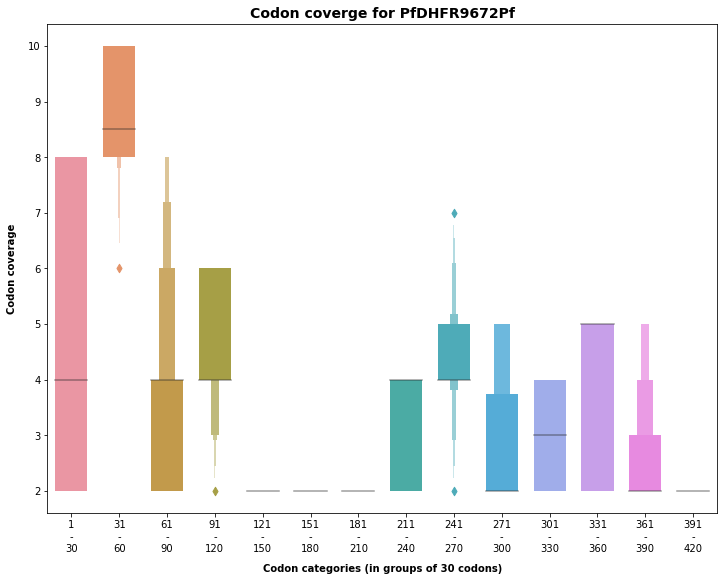

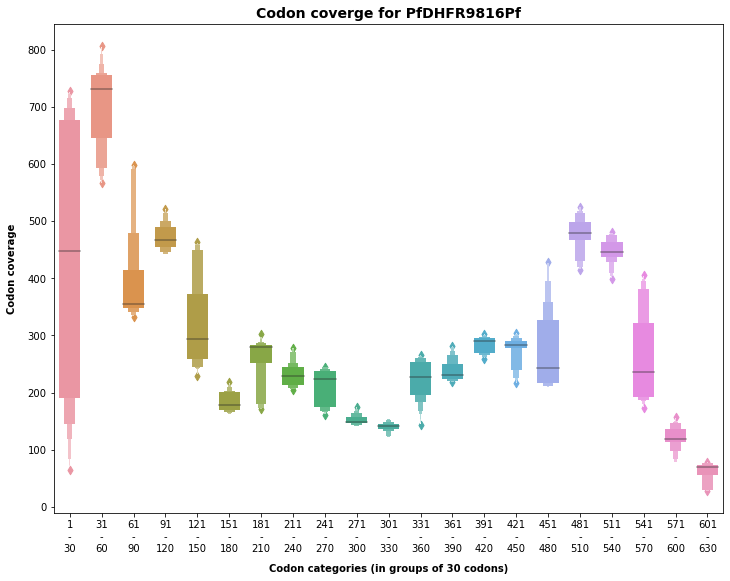

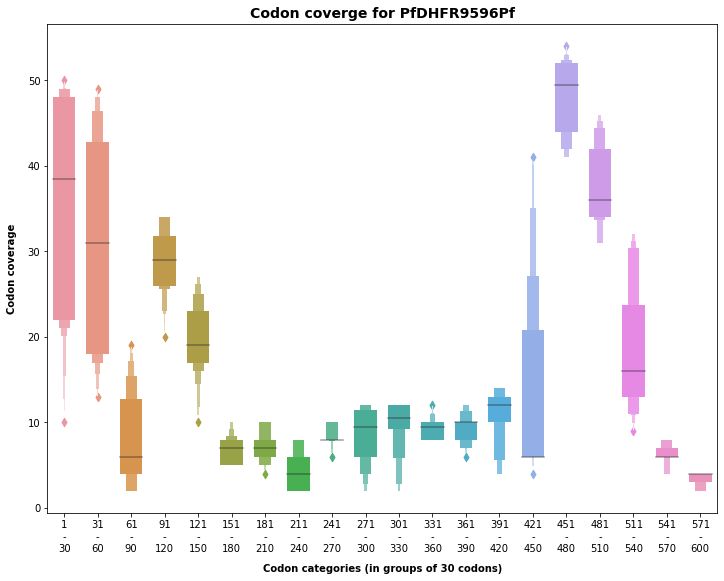

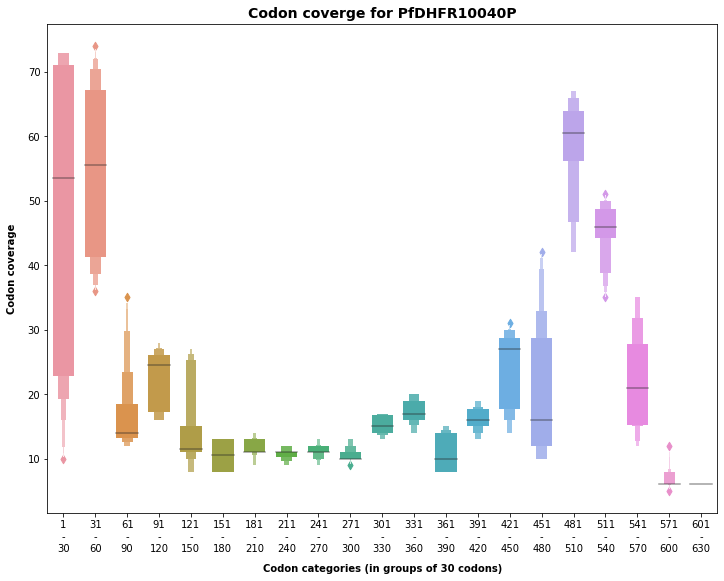

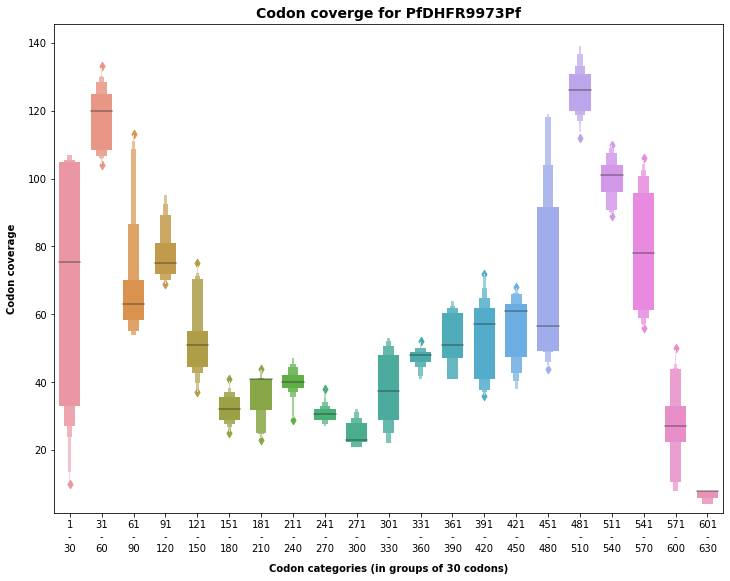

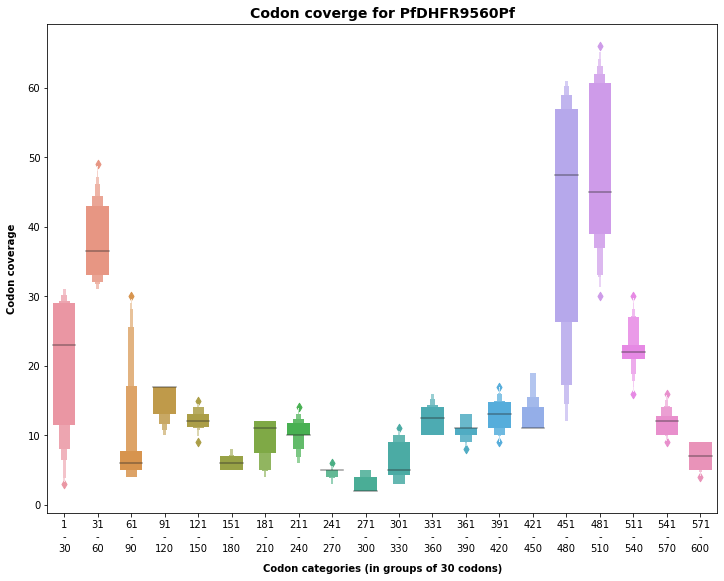

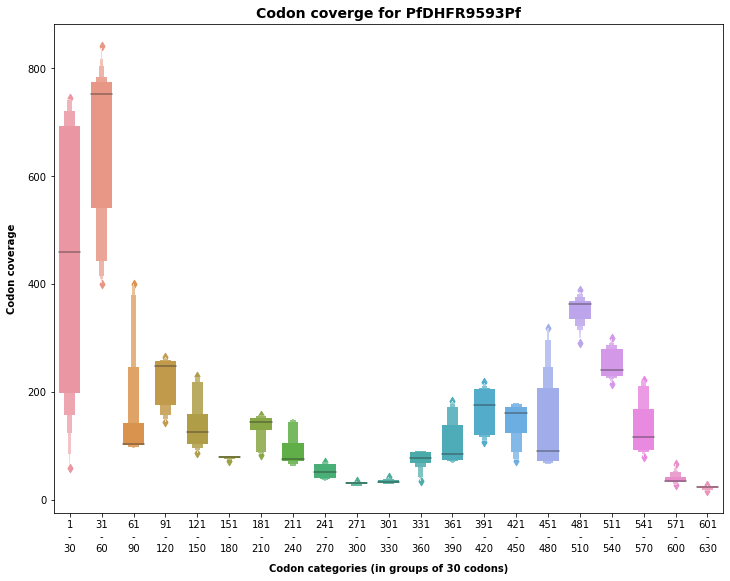

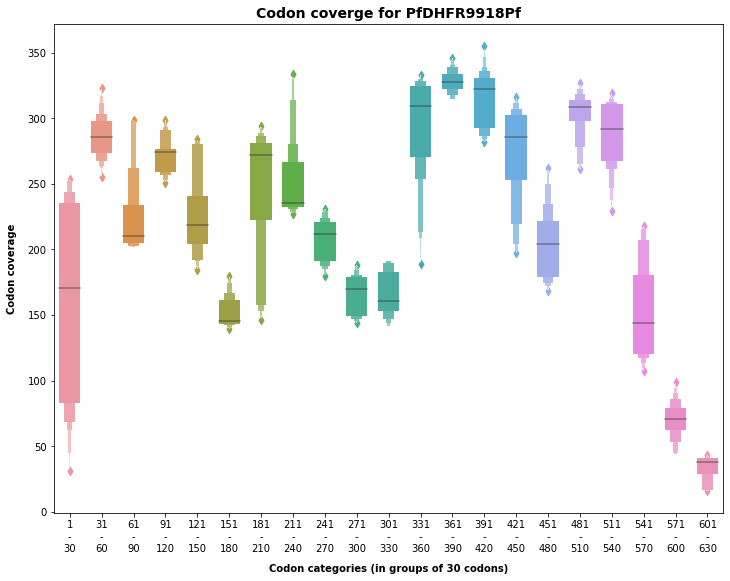

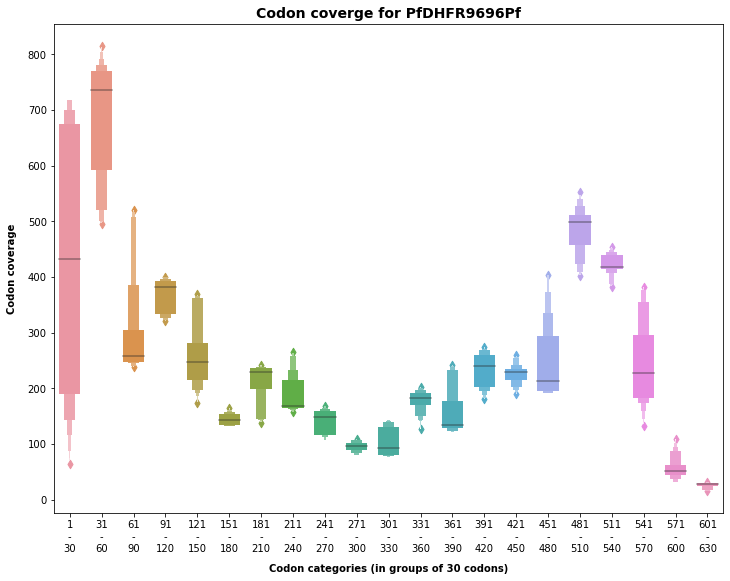

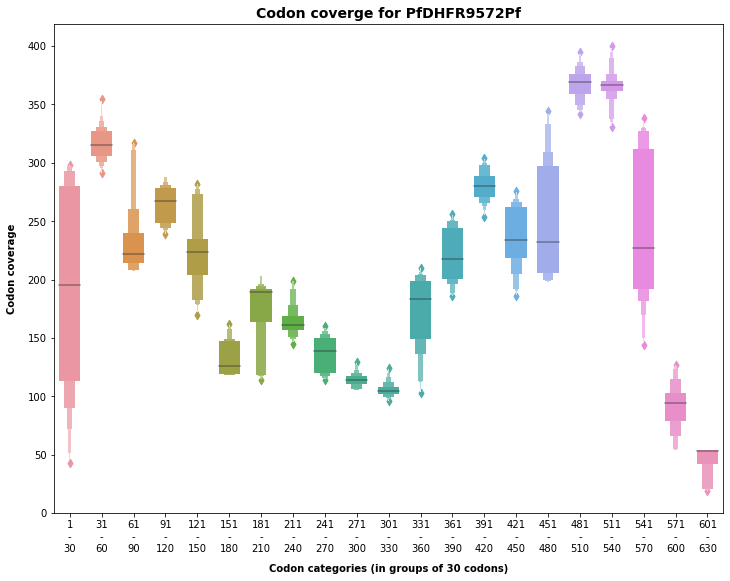

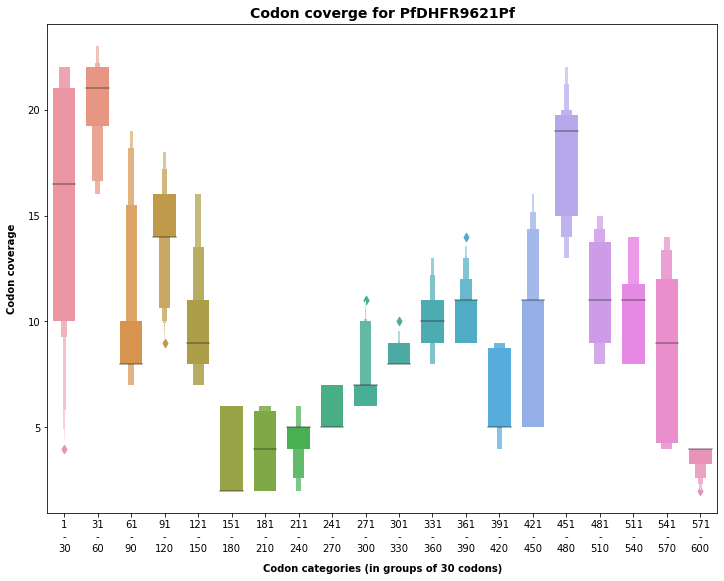

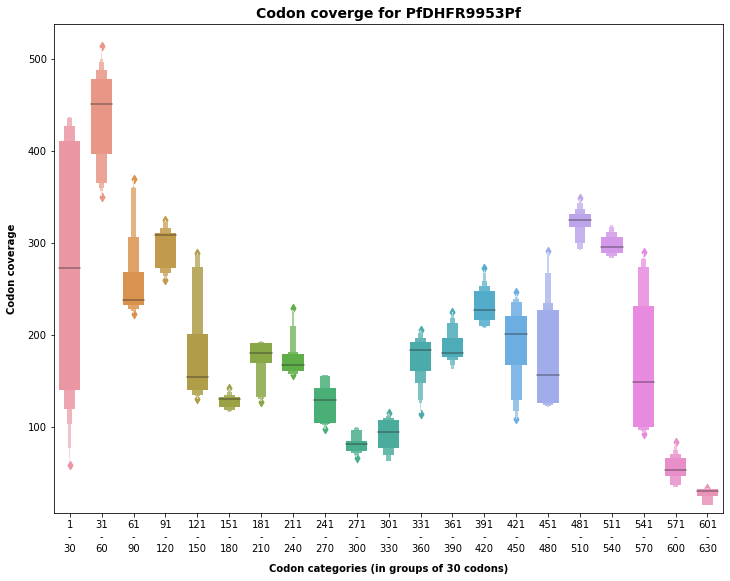

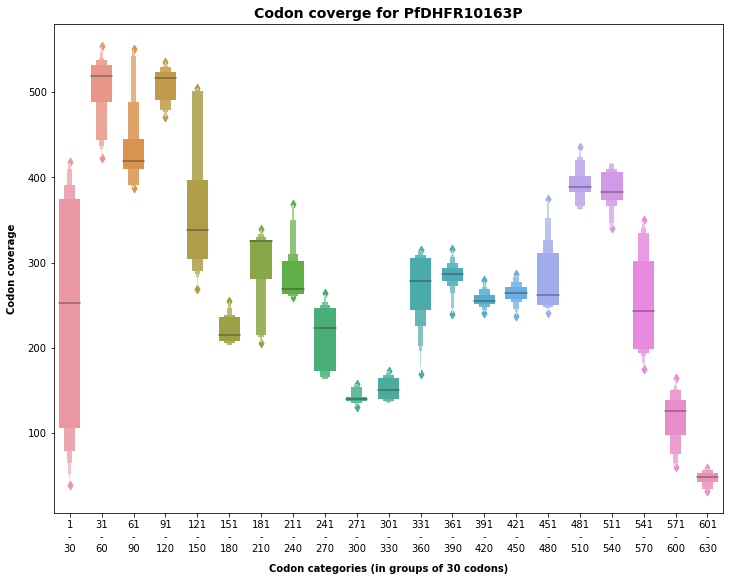

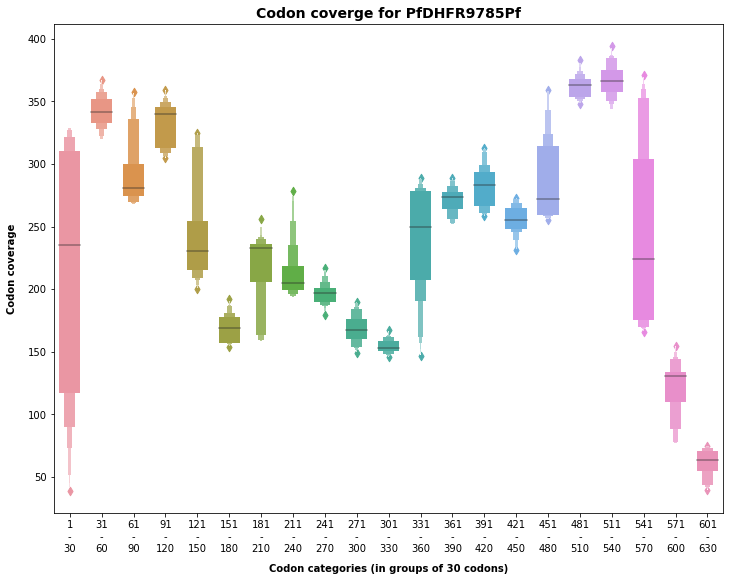

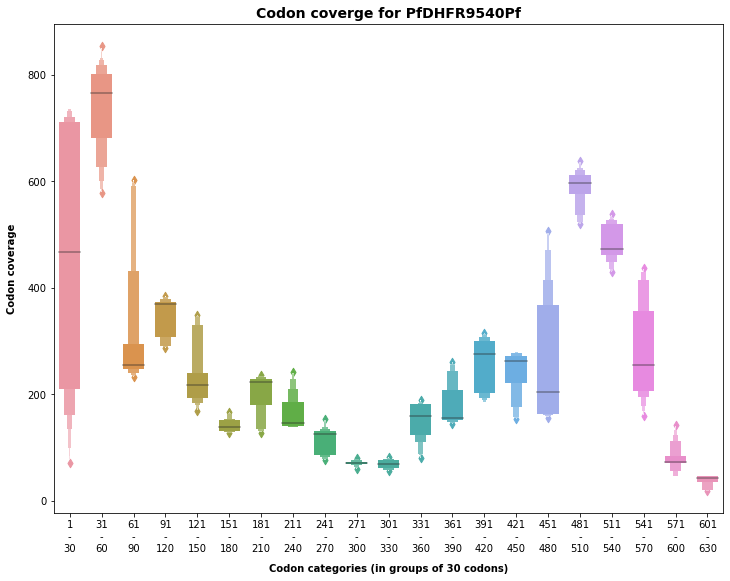

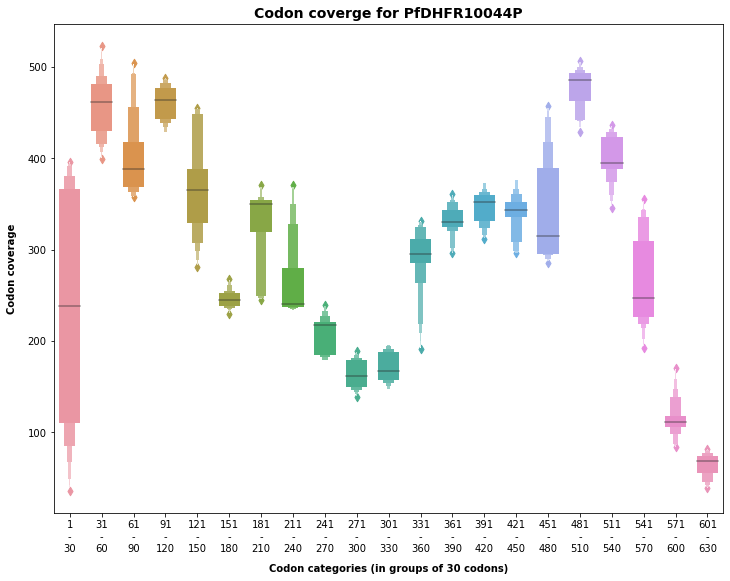

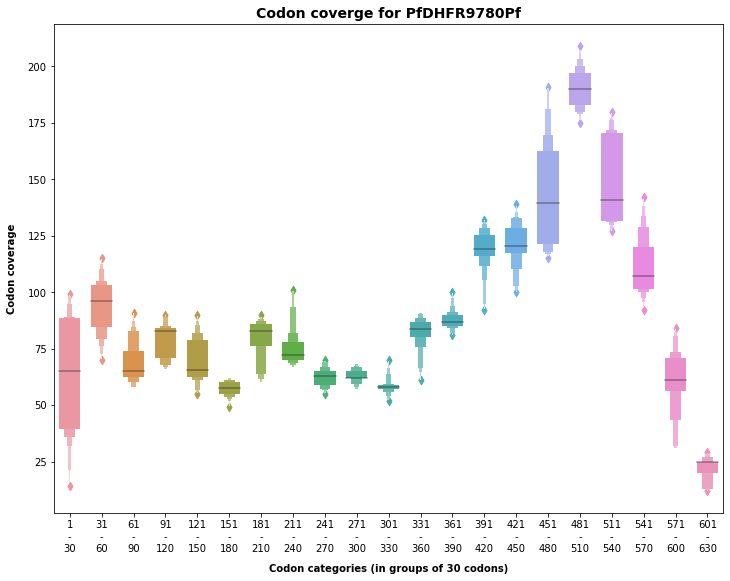

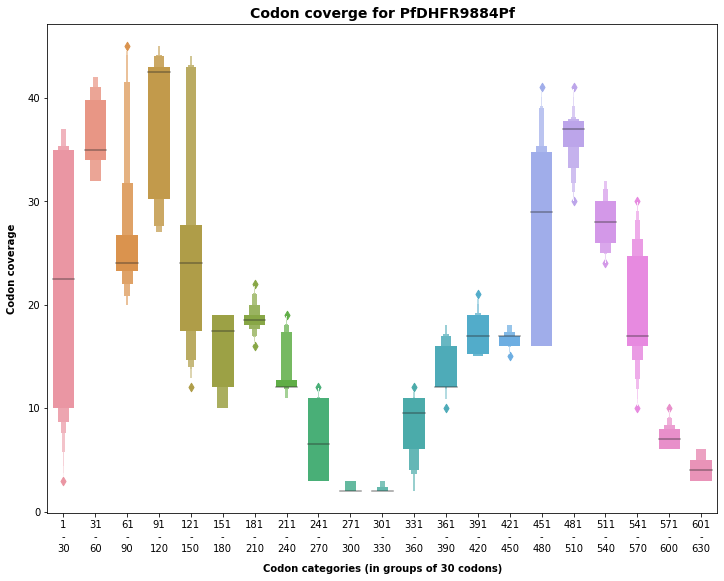

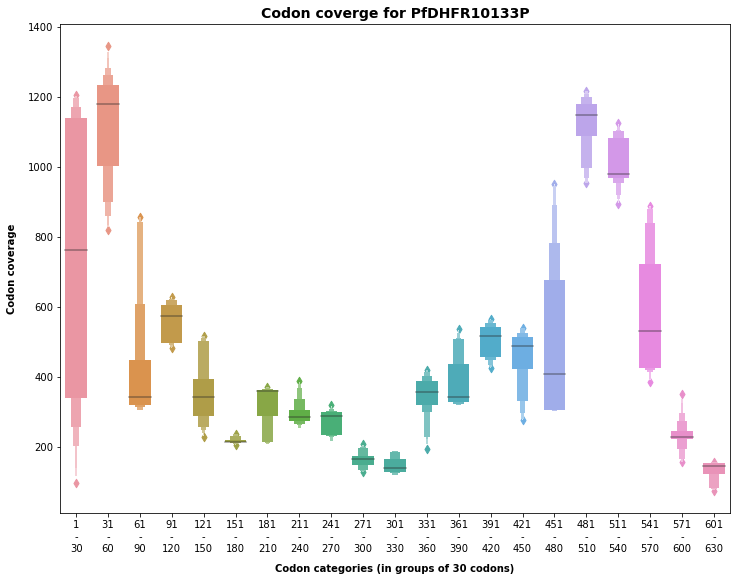

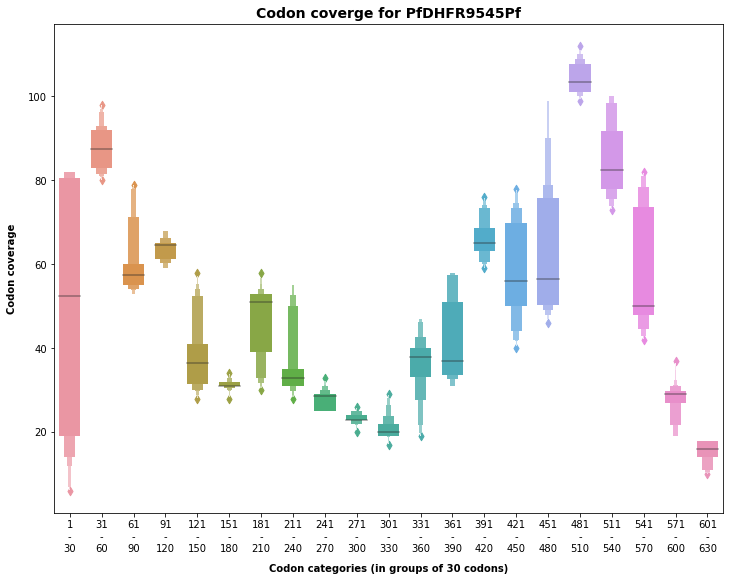

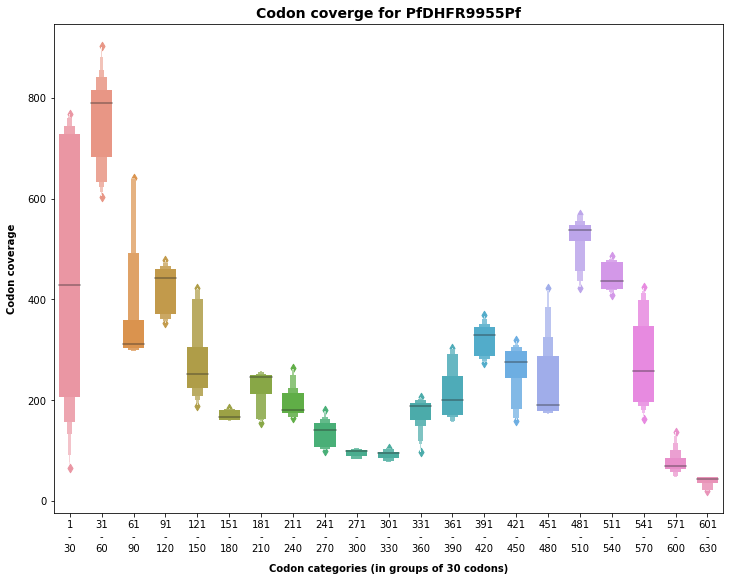

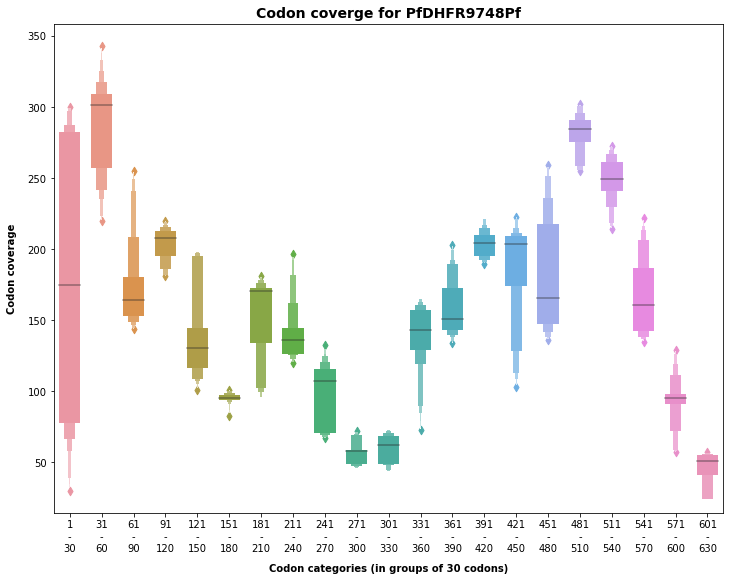

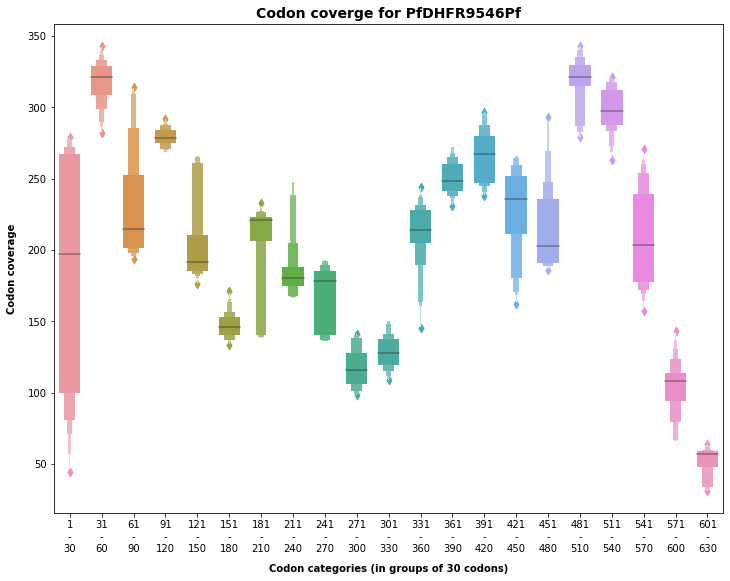

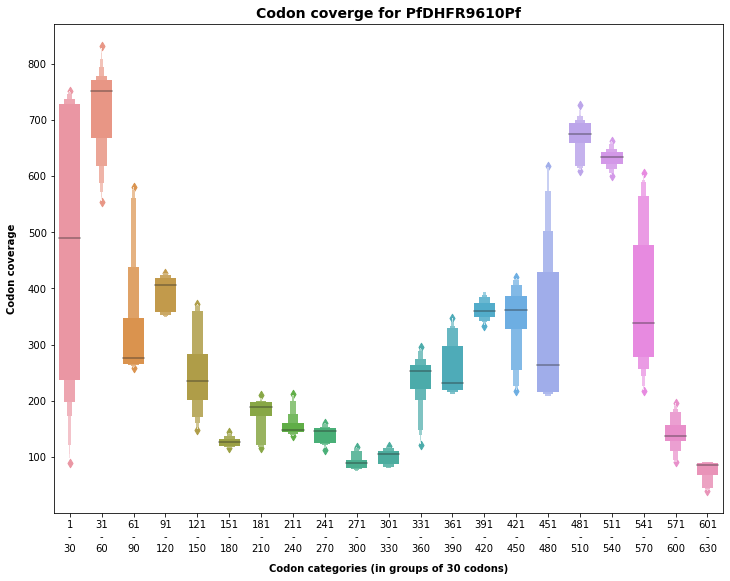

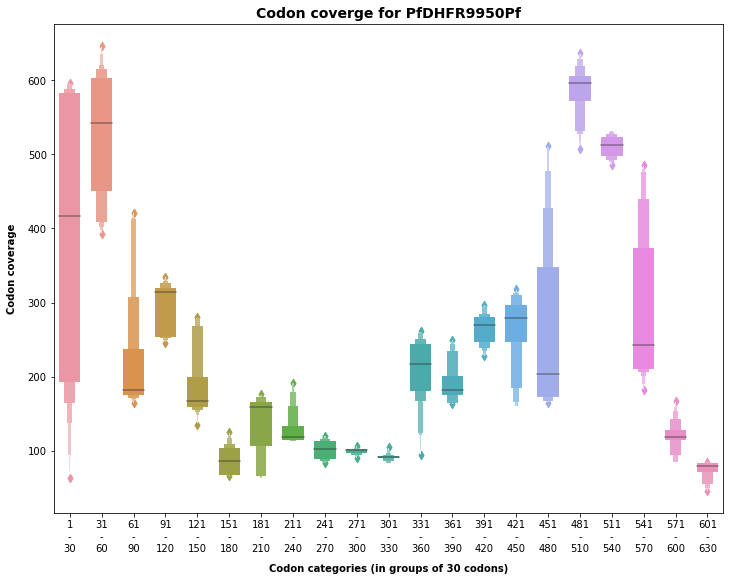

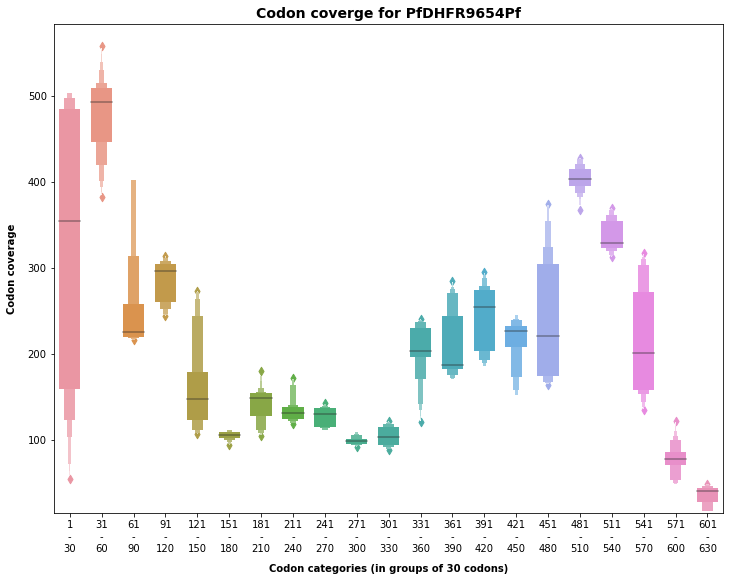

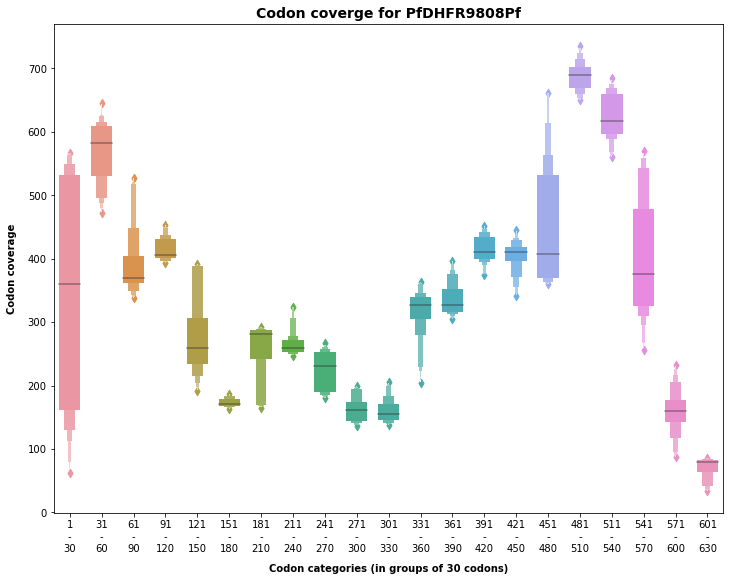

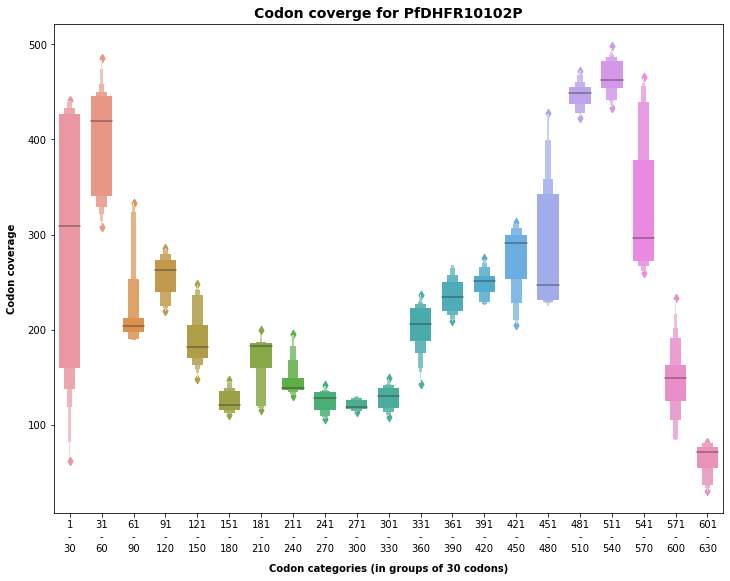

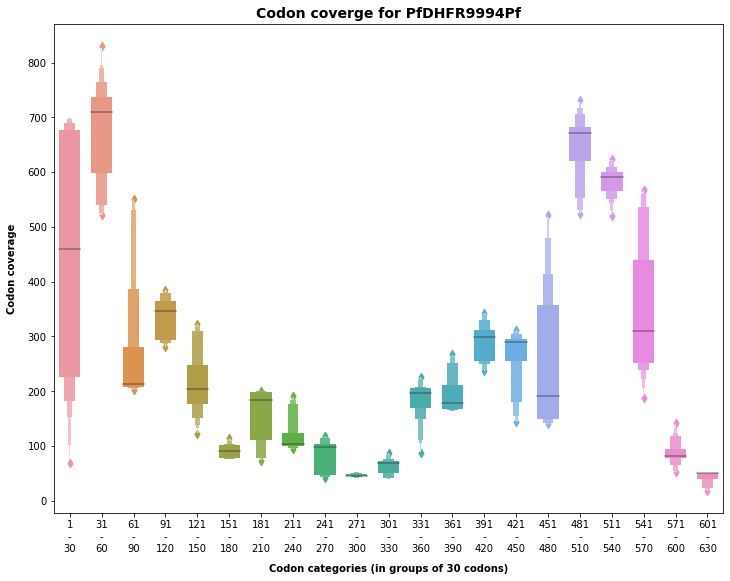

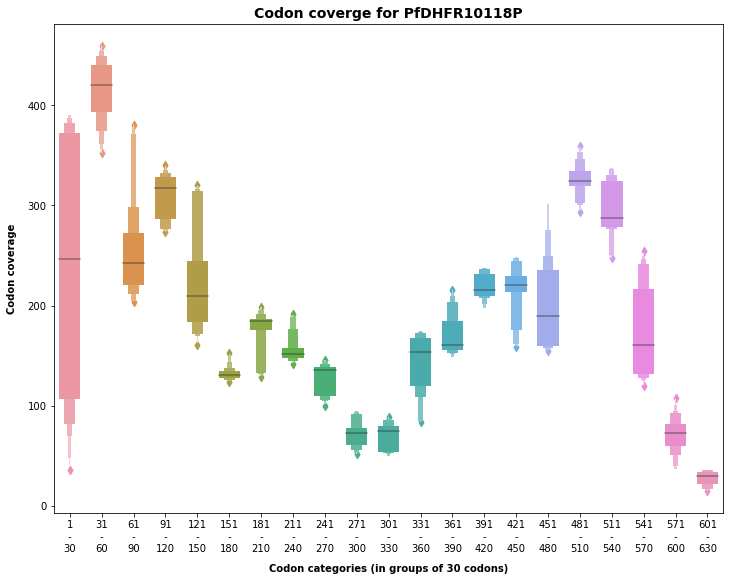

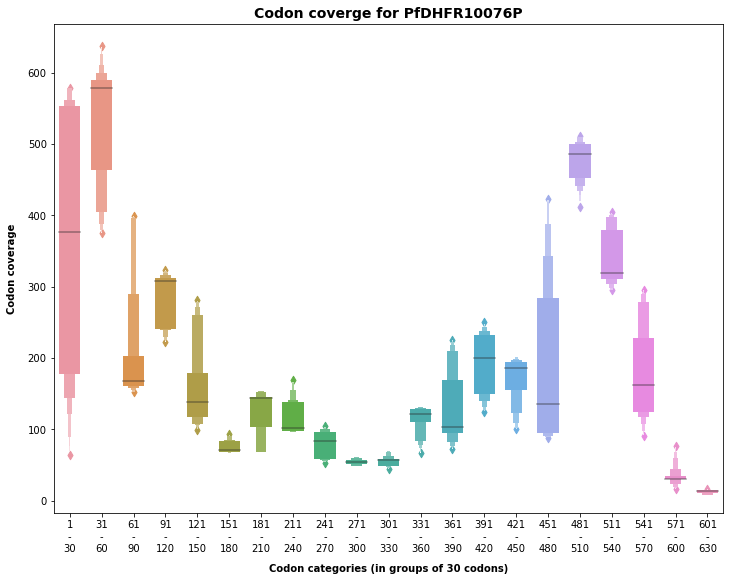

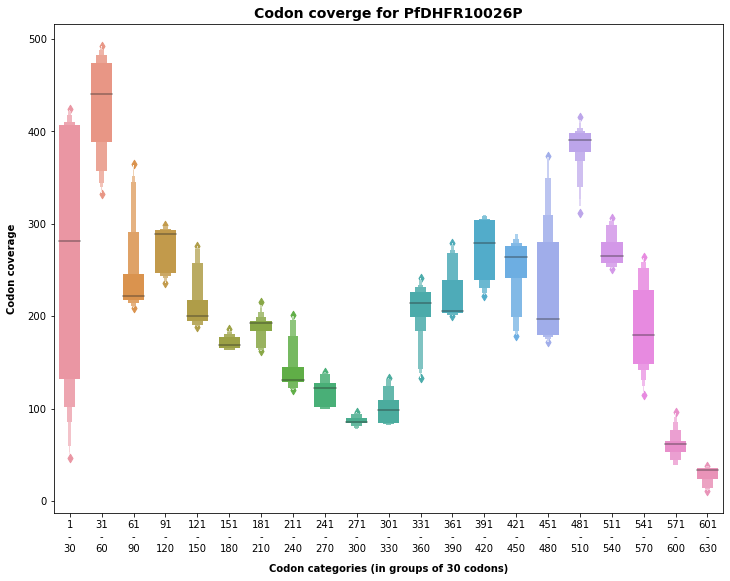

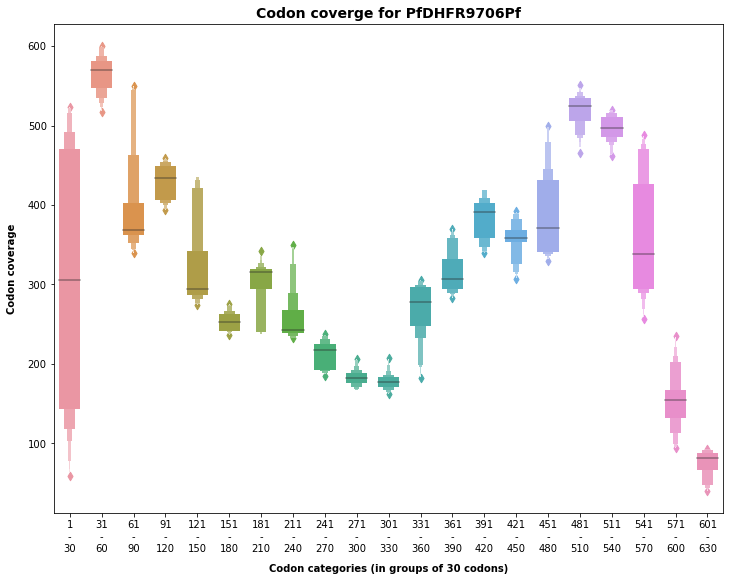

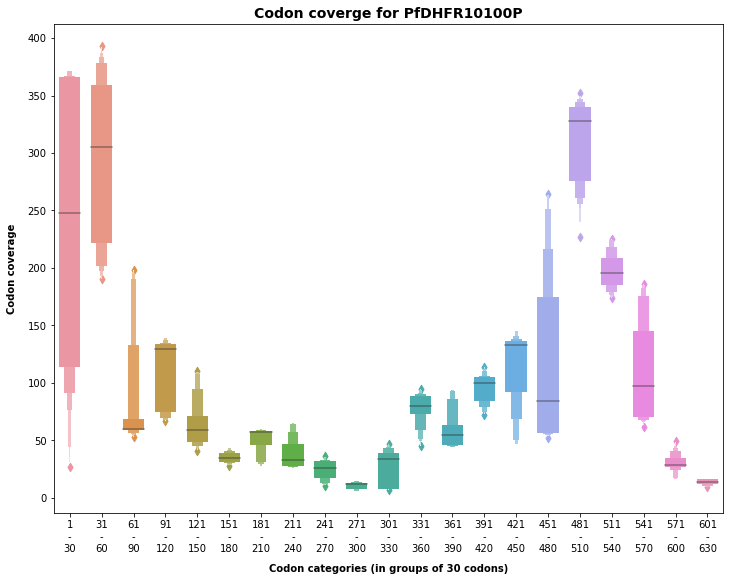

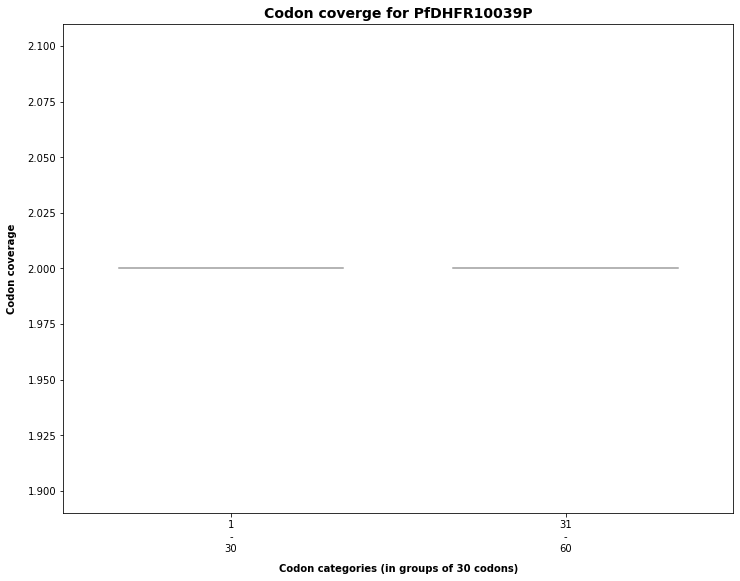

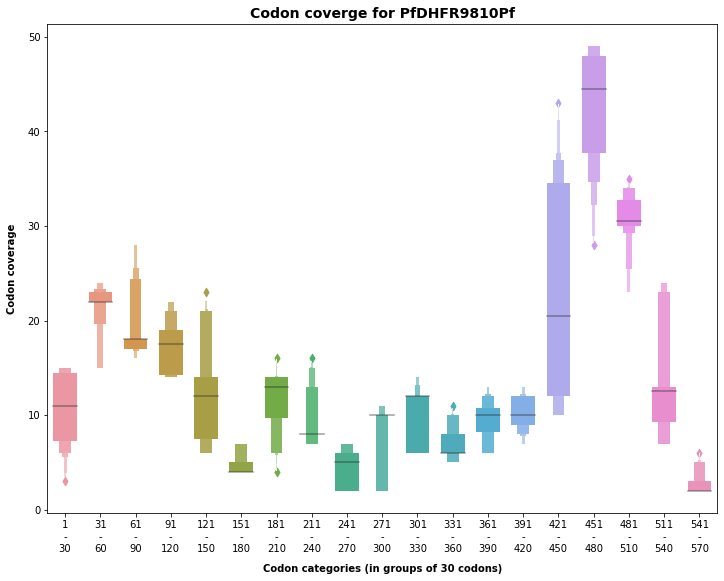

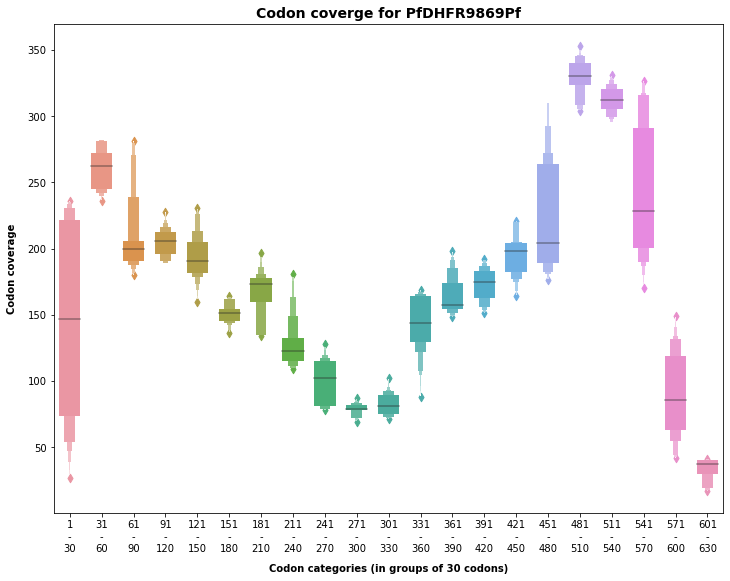

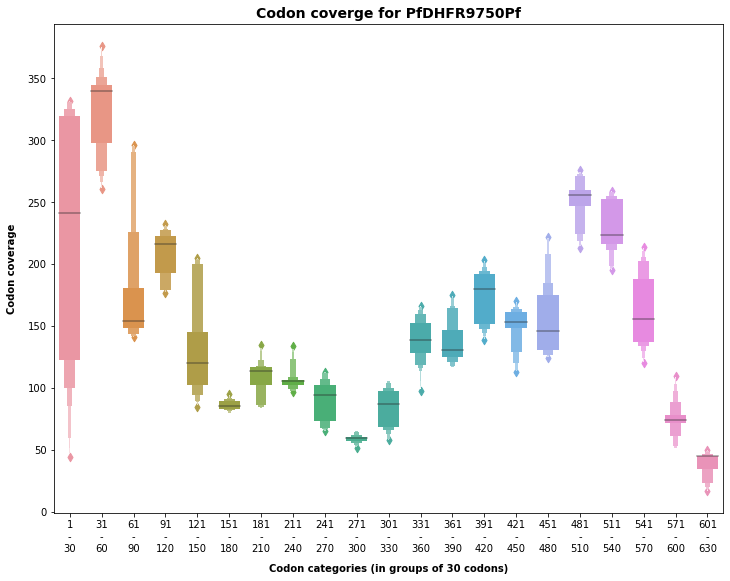

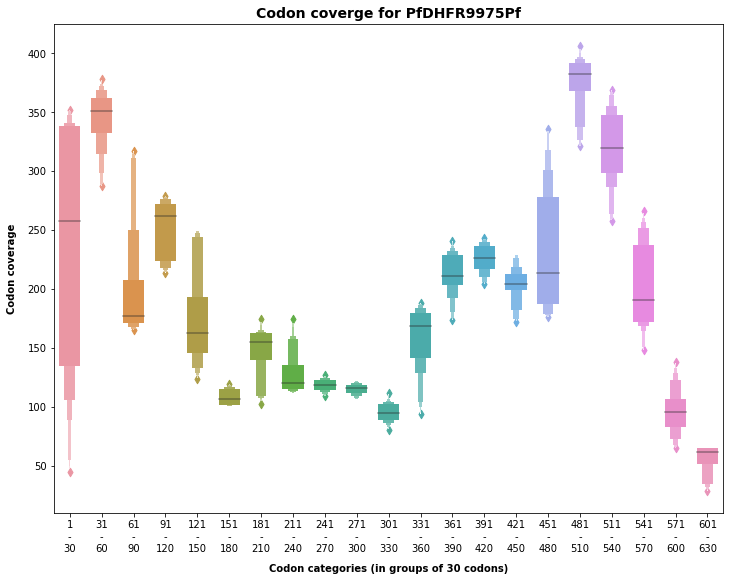

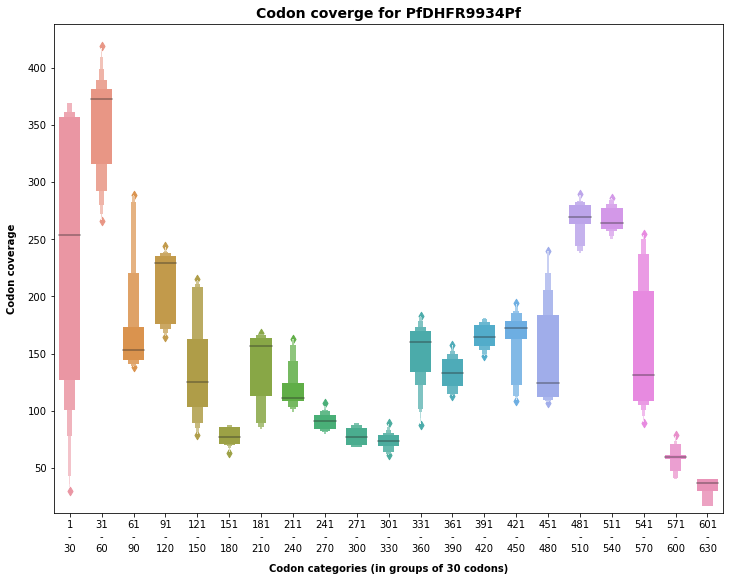

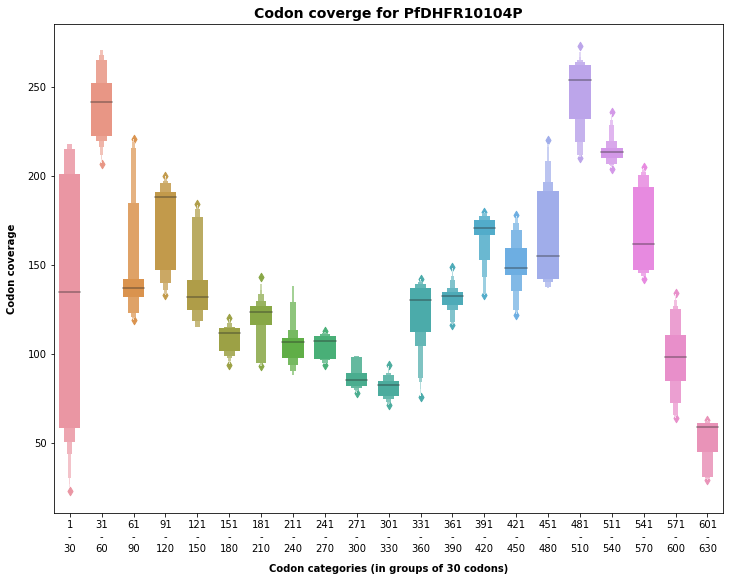

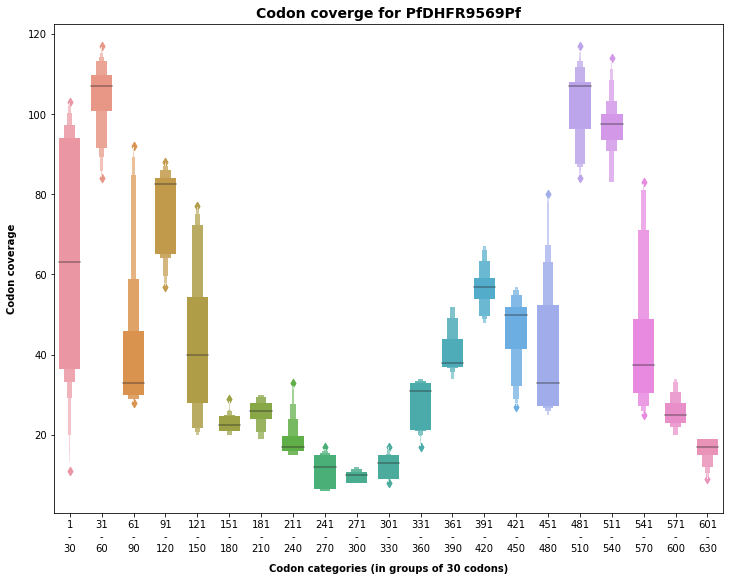

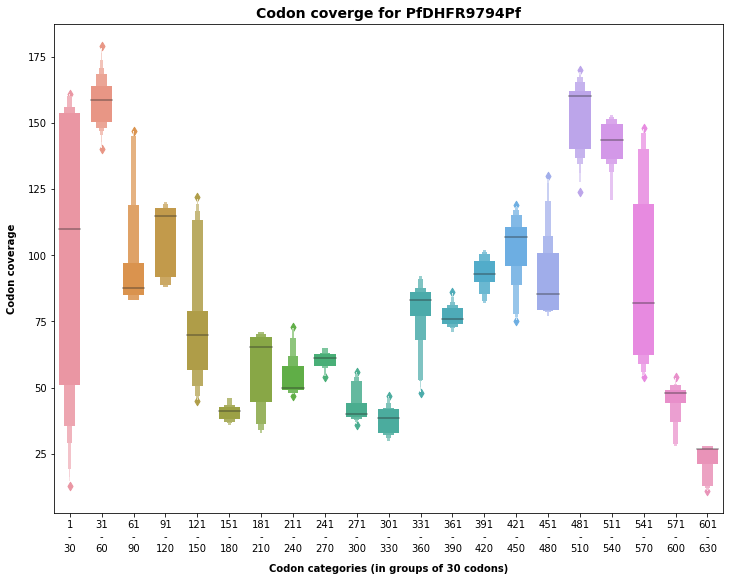

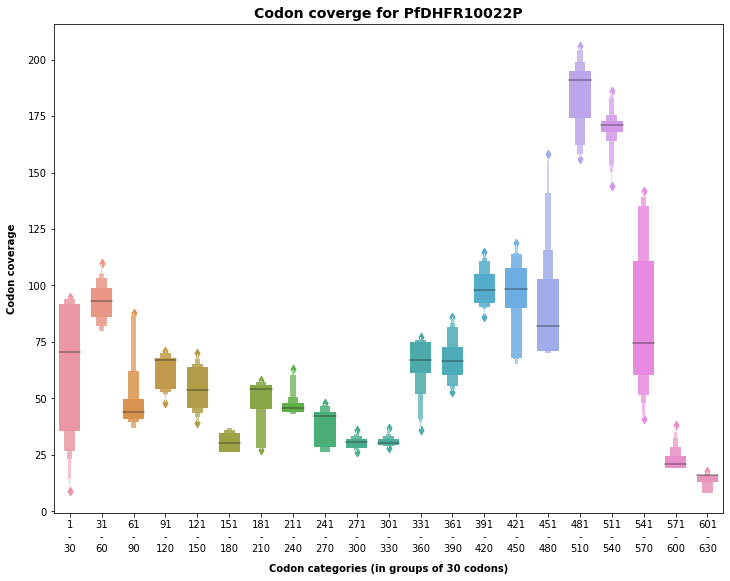

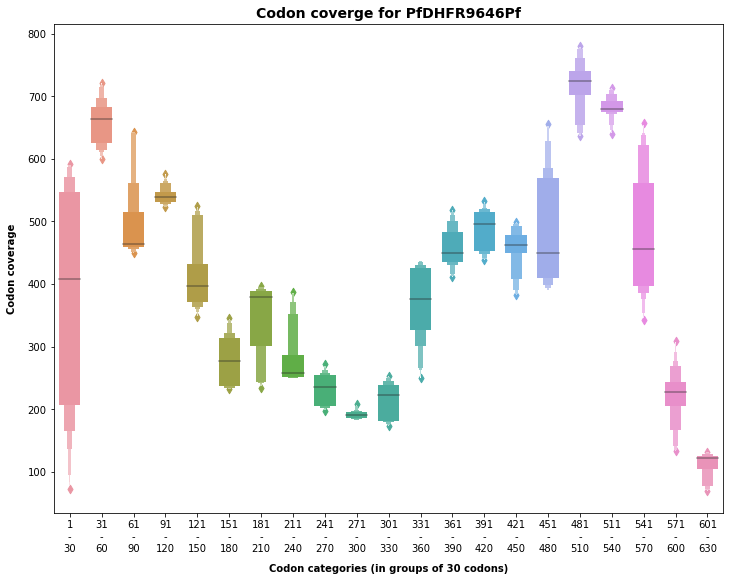

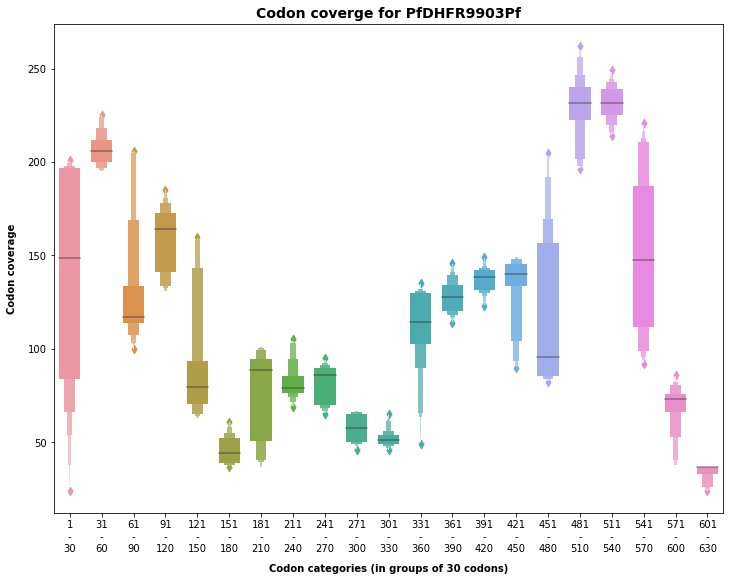

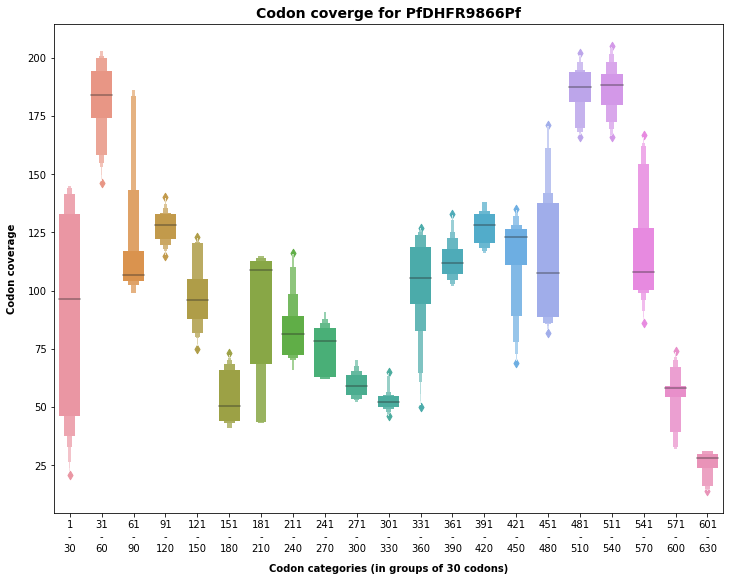

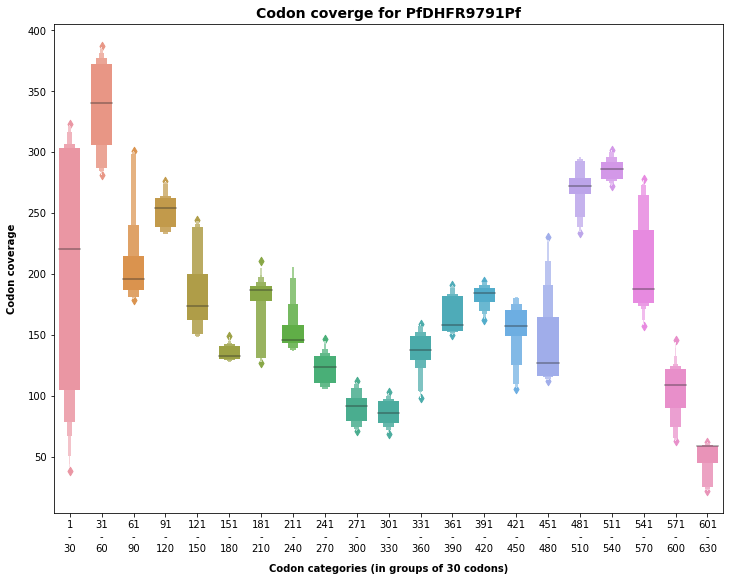

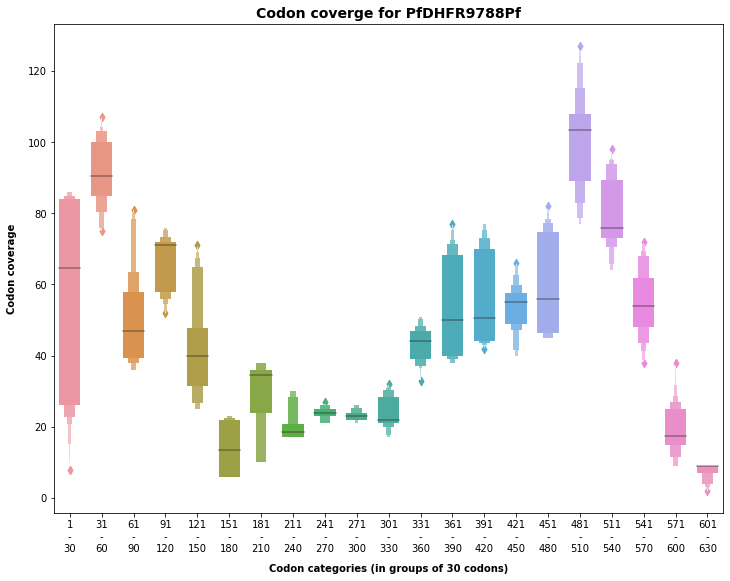

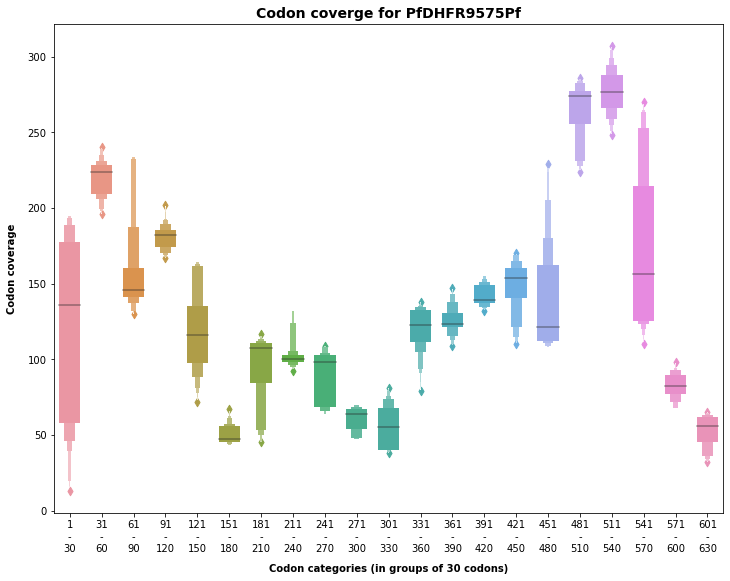

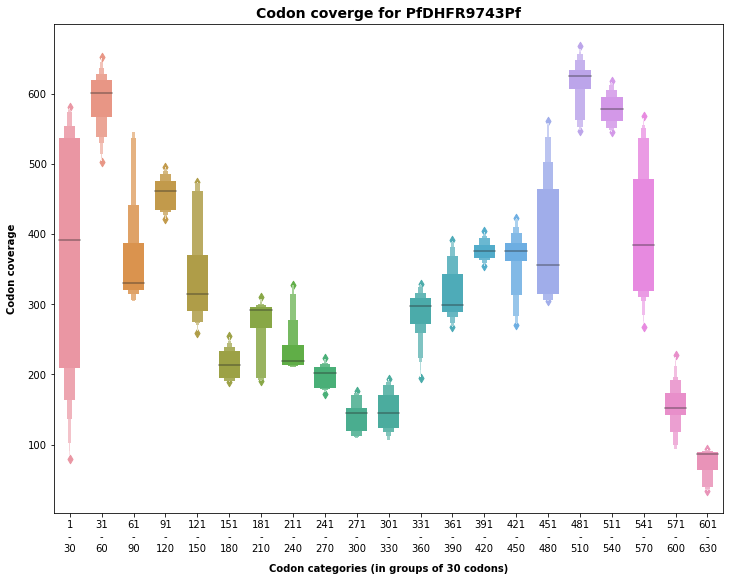

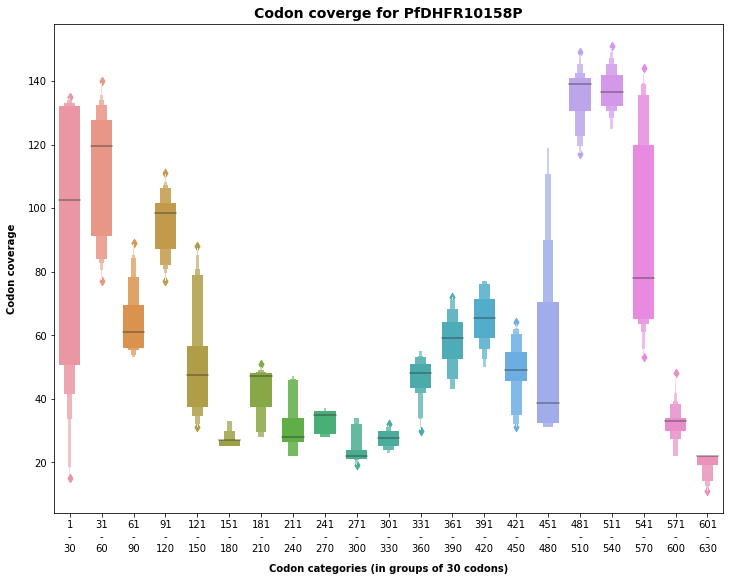

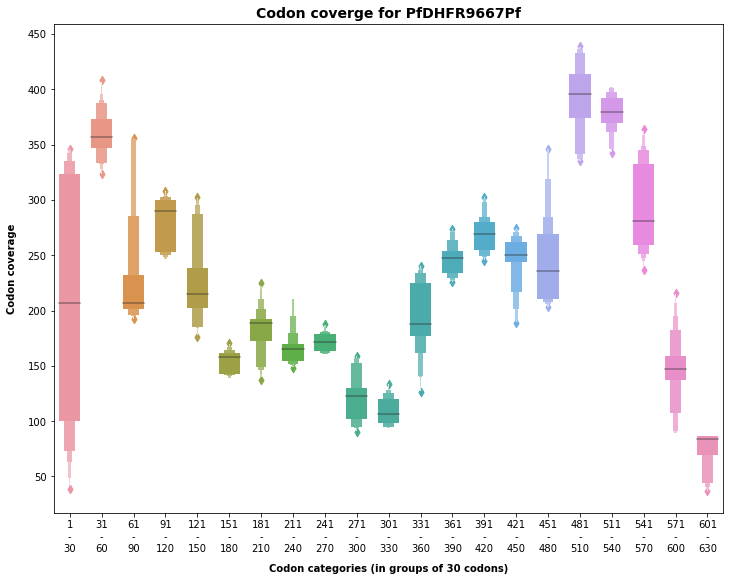

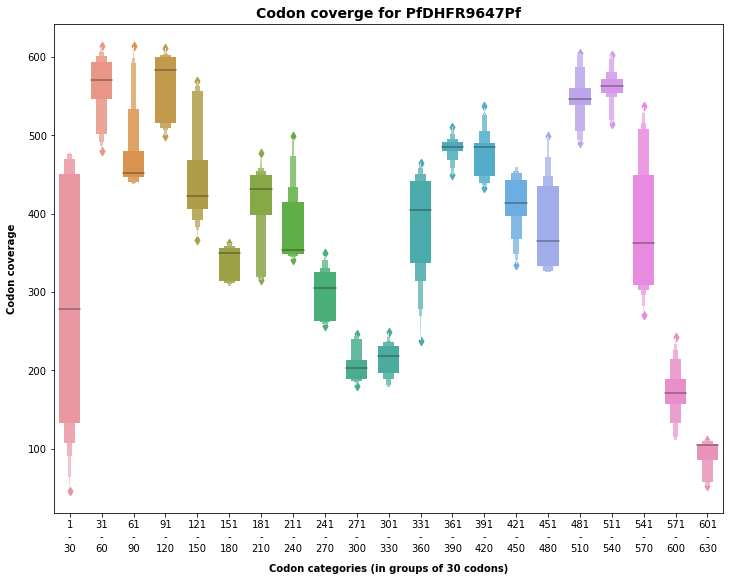

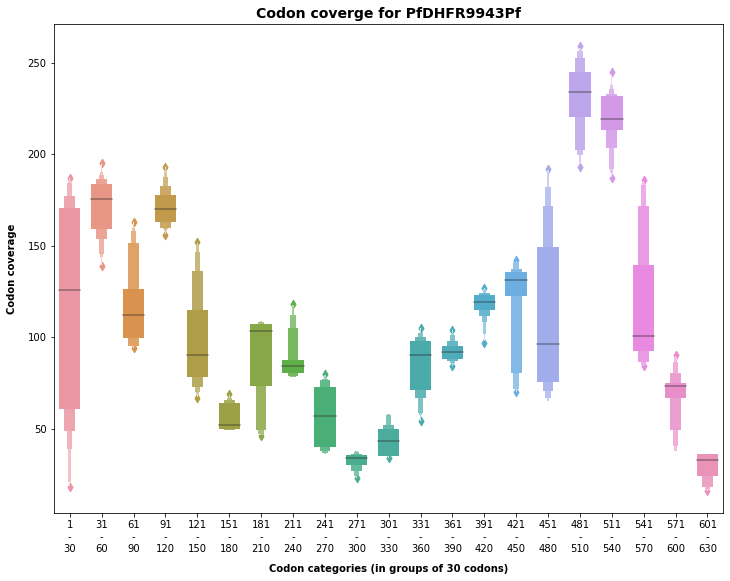

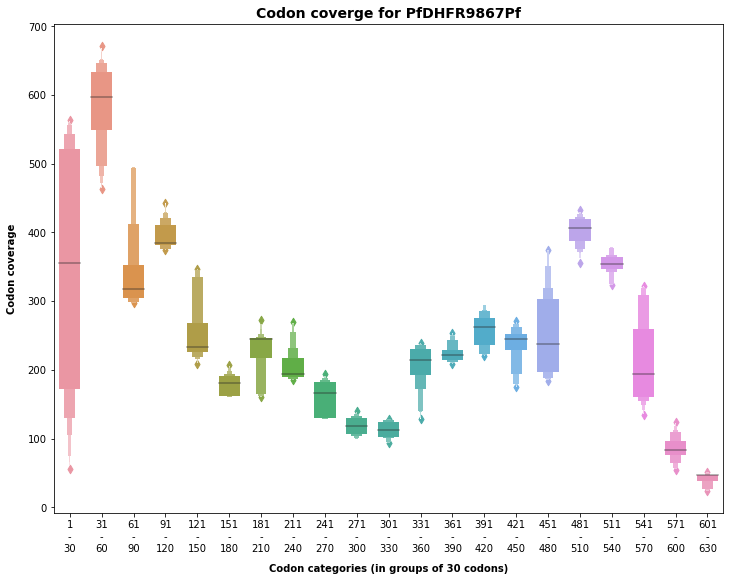

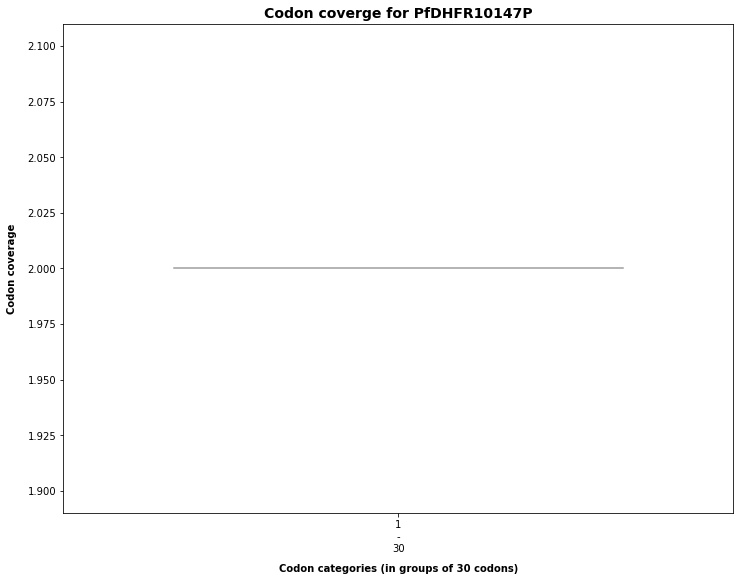

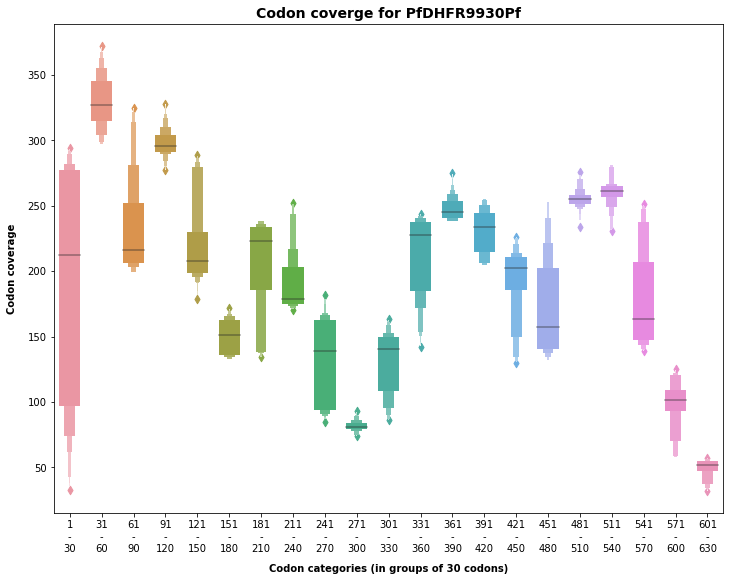

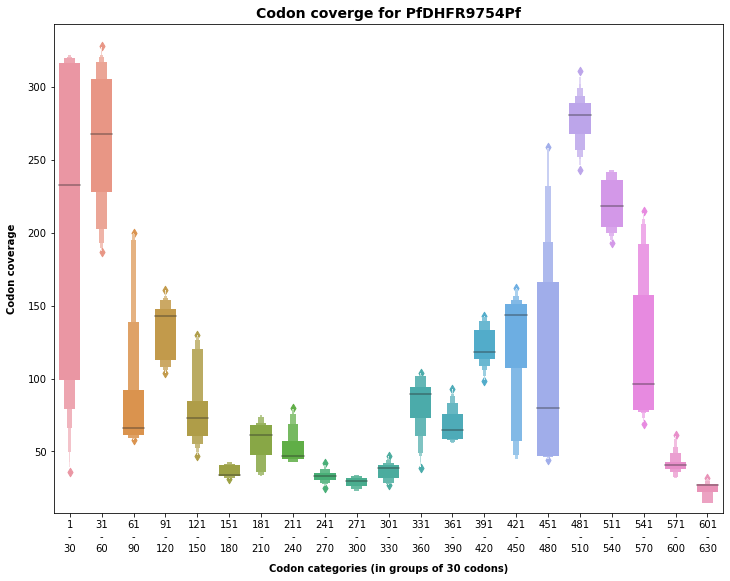

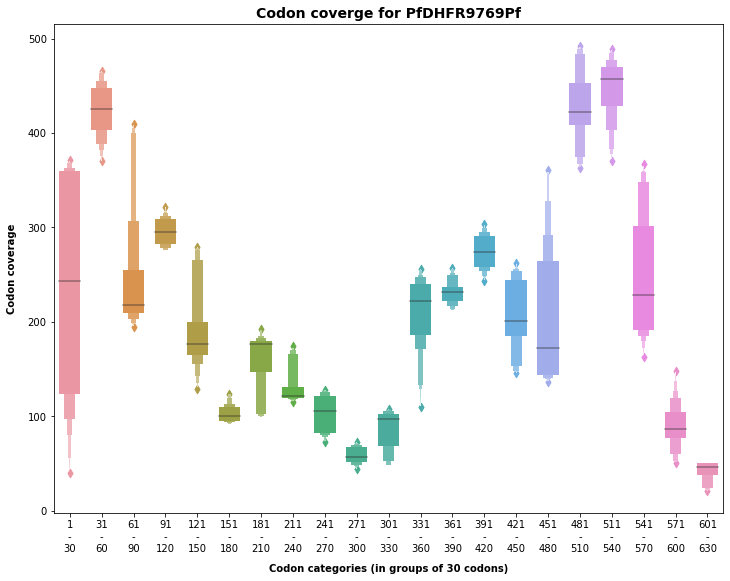

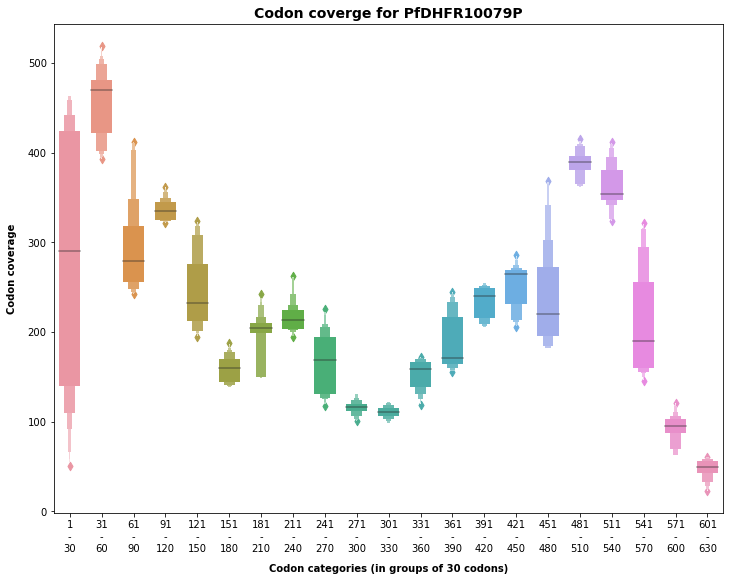

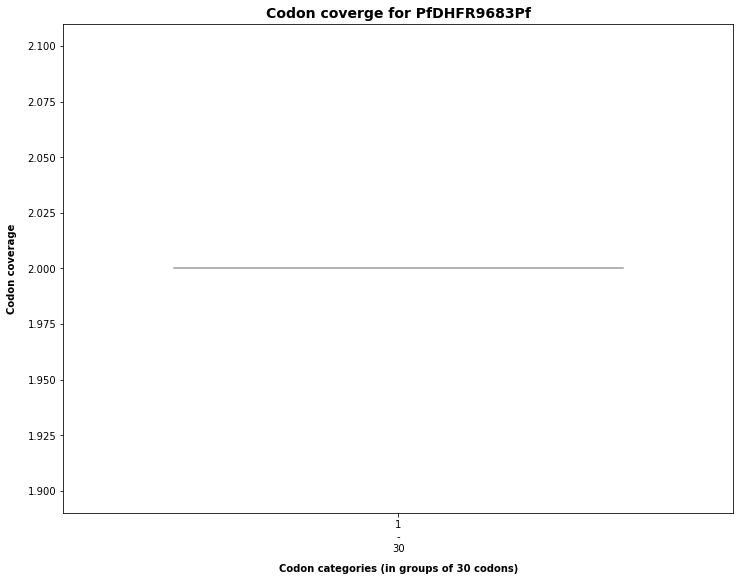

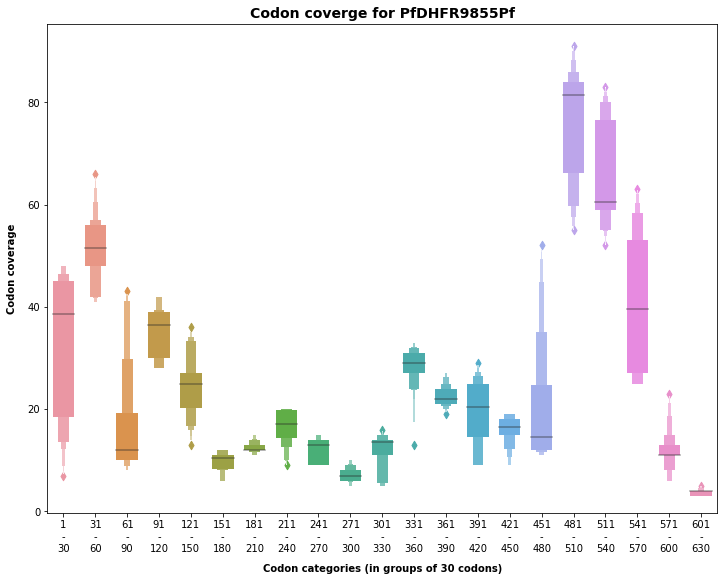

In [1]:
import os
import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib as mplt
mplt.rcParams.update({'figure.max_open_warning': 0})

def plotGraph(inputfile, outputfile, sample_id):
    data_list = []
    final = []
    dict_data = {}
    keys_list=[]
    with open(inputfile) as f1:
        for line in f1:
            new=line.split(",")
        for i in range(len(new)):
            if len(new[i]) != 0:
                final.append(int(new[i]))
        for i in range(0, len(final), 30):
            data_list.append(final[i:i+30])
        for i in range(0, len(final), 30):
            key = str(i+1)+ "\n-\n" +str(i + 30)
            #print(key)
            dict_data[key] = final[i:i+30]
            keys_list.append(key)

    fig, ax = plt.subplots(figsize=(12, 9))

    vals_tup= tuple(data_list)
    keys_tup = tuple(keys_list)

    bp = sns.boxenplot(data = vals_tup, width = 0.67)
    title = 'Codon coverge for PfDHFR'+ sample_id
    ax.set_title(title, fontweight ='bold', fontsize = 14)
    ax.set_ylabel('Codon coverage', fontweight ='bold', labelpad = 10.5)
    ax.set_xlabel('Codon categories (in groups of 30 codons)', fontweight ='bold', labelpad = 10.5)
   
    plt.xticks(plt.xticks()[0], labels = keys_tup)

    fig.savefig(outputfile, bbox_inches='tight')




img_dir = r'/Users/mansi/Desktop/haiti-ind/PfDHFR/Images/'
directory = r'/Users/mansi/Desktop/haiti-ind/PfDHFR/Category_results/avg_cat_cov' #input directory
for filename in os.listdir(directory):
    if filename != ".DS_Store" and filename != "Controls":
        filepath = os.path.join(directory, filename)
        sample_num = filename[4:10]
        img_filepath = img_dir+str(sample_num)+"-PfDHFR-plot.png"
        #print(img_filepath)
        plotGraph(filepath, img_filepath, sample_num)